# Proyek Analisis Data: E-Commerce Public
- **Nama:** [Faridz Salman Al Parissy]
- **Email:** [faridzsalman89@upi.edu]
- **ID Dicoding:** [faridz_salman_9dt8]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren total pesanan per kategori produk dari tahun 2016 hingga 2018 dan kategori apa saja yang palign banyak pendapatan dan penjualannya?
- Pertanyaan 2: Bagaimana tren penjualan per kategori produk dari tahun 2016 hingga 2018, dan kategori mana yang menunjukkan pertumbuhan paling signifikan?
- Pertanyaan 3: Bagaimana tren penjualan dan rata-rata skor ulasan per bulan dari tahun 2016 hingga 2018, serta bulan mana yang menunjukkan pertumbuhan paling signifikan dalam penjualan pertahun?
- Pertanyaan 4: Berapa banyak pesanan yang berhasil terkirim tepat waktu dibandingkan dengan yang terlambat selama tahun 2017, dan faktor apa yang paling berpengaruh terhadap keterlambatan pengiriman?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import seaborn as sns
import streamlit as st
import datetime as dt
import os
from matplotlib.ticker import FuncFormatter
from babel.numbers import format_currency
from unidecode import unidecode
os.getcwd()

'c:\\Users\\farid\\Latihan VSCode\\Latihan Data Analyst\\Data Analyst\\Contoh 1\\Proyek'

## Data Wrangling

### Gathering Data

In [2]:
customer_dataset_df = pd.read_csv(r'C:\Users\farid\Latihan VSCode\Latihan Data Analyst\Data Analyst\Dataset\Dataset - E-commerce Public\customers_dataset.csv')
geolocation_dataset_df = pd.read_csv(r'C:\Users\farid\Latihan VSCode\Latihan Data Analyst\Data Analyst\Dataset\Dataset - E-commerce Public\geolocation_dataset.csv')
product_dataset_df = pd.read_csv(r'C:\Users\farid\Latihan VSCode\Latihan Data Analyst\Data Analyst\Dataset\Dataset - E-commerce Public\products_dataset.csv')
product_category_name_df = pd.read_csv(r'C:\Users\farid\Latihan VSCode\Latihan Data Analyst\Data Analyst\Dataset\Dataset - E-commerce Public\product_category_name_translation.csv')
sellers_dataset_df = pd.read_csv(r'C:\Users\farid\Latihan VSCode\Latihan Data Analyst\Data Analyst\Dataset\Dataset - E-commerce Public\sellers_dataset.csv')
order_items_dataset_df = pd.read_csv(r'C:\Users\farid\Latihan VSCode\Latihan Data Analyst\Data Analyst\Dataset\Dataset - E-commerce Public\order_items_dataset.csv')
order_dataset_df = pd.read_csv(r'C:\Users\farid\Latihan VSCode\Latihan Data Analyst\Data Analyst\Dataset\Dataset - E-commerce Public\orders_dataset.csv')
order_payments_dataset_df = pd.read_csv(r'C:\Users\farid\Latihan VSCode\Latihan Data Analyst\Data Analyst\Dataset\Dataset - E-commerce Public\order_payments_dataset.csv')
order_review_dataset_df = pd.read_csv(r'C:\Users\farid\Latihan VSCode\Latihan Data Analyst\Data Analyst\Dataset\Dataset - E-commerce Public\order_reviews_dataset.csv')

**Insight:**
- xxx
- xxx

### Assessing Data

#### customers_dataset_df

In [3]:
customer_dataset_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customer_dataset_df.info()
customer_dataset_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [5]:
print('Duplicate customer_dataset_df: ', customer_dataset_df.duplicated().sum())
customer_dataset_df.isna().sum()

Duplicate customer_dataset_df:  0


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

#### geolocation_dataset_df

- Terdapat Duplikasi pada data sebanyak 261831
- Terdapat karakter simbol yang tidak dibutuhkan

In [6]:
geolocation_dataset_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [7]:
geolocation_dataset_df.info()
geolocation_dataset_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [8]:
print('Duplicate geolocation_dataset_df: ', geolocation_dataset_df.duplicated().sum())
geolocation_dataset_df.isna().sum()

Duplicate geolocation_dataset_df:  261831


geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

#### order_items_dataset_df

- Kesalahan dalam tipe untuk shipping_limit_date

In [9]:
order_items_dataset_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
order_items_dataset_df.info()
order_items_dataset_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [11]:
print('Duplicate order_items_dataset_df: ', order_items_dataset_df.duplicated().sum())
order_items_dataset_df.isna().sum()

Duplicate order_items_dataset_df:  0


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

#### order_payments_dataset_df

In [12]:
order_payments_dataset_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [13]:
order_payments_dataset_df.info()
order_payments_dataset_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [14]:
print('Duplicate order_payments_dataset_df: ', order_payments_dataset_df.duplicated().sum())
order_payments_dataset_df.isna().sum()

Duplicate order_payments_dataset_df:  0


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

#### order_reviews_dataset_df

- Kesalahan tipe data di review_creation_date dan review_answer_timestamp
- Terdapat missing value tetapi harus di perhatikan penting atau tidak (harus di merge)

In [15]:
order_review_dataset_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [16]:
order_review_dataset_df.info()
order_review_dataset_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,08528f70f579f0c830189efc523d2182,df56136b8031ecd28e200bb18e6ddb2e,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [17]:
print('Duplicate order_review_dataset_df: ', order_review_dataset_df.duplicated().sum())
order_review_dataset_df.isna().sum()

Duplicate order_review_dataset_df:  0


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

#### orders_dataset_df

- Kesalahan pada tipedata
- Terdapat Missing Value

In [18]:
order_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [19]:
order_dataset_df.info()
order_dataset_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [20]:
print('Duplicate order_dataset_df: ', order_dataset_df.duplicated().sum())
order_dataset_df.isna().sum()

Duplicate order_dataset_df:  0


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

#### product_dataset_df

- Missing Values

In [21]:
product_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [22]:
product_dataset_df.info()
product_dataset_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [23]:
print('Duplicate product_dataset_df: ', product_dataset_df.duplicated().sum())
product_dataset_df.isna().sum()

Duplicate product_dataset_df:  0


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

#### product_category_name_df

In [24]:
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [25]:
product_category_name_df.info()
product_category_name_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [26]:
print('Duplicate product_category_name_df: ', product_category_name_df.duplicated().sum())
product_category_name_df.isna().sum()

Duplicate product_category_name_df:  0


product_category_name            0
product_category_name_english    0
dtype: int64

#### sellers_dataset_df

In [27]:
sellers_dataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [28]:
sellers_dataset_df.info()
sellers_dataset_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [29]:
print('Duplicate sellers_dataset_df: ', sellers_dataset_df.duplicated().sum())
sellers_dataset_df.isna().sum()

Duplicate sellers_dataset_df:  0


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

#### **Insight:**
- Banyak tipe data yang salah terutama pada tanggal/datetime
- Terdapat beberapa yang terduplikasi
- Terdapat beberapa yang missing values tetapi harus diperhatikan apakah harus dihapus atau tidak

### Cleaning Data

#### Memperbaiki symbol yang tidak dibutuhkan

##### geolocation_dataset_df

In [30]:
geolocation_dataset_df.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


In [31]:
geolocation_dataset_df[geolocation_dataset_df['geolocation_city'] == 'são paulo']

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
5,1012,-23.547762,-46.635361,são paulo,SP
14,1037,-23.545187,-46.637855,são paulo,SP
17,1024,-23.541390,-46.629899,são paulo,SP
21,1020,-23.552235,-46.628441,são paulo,SP
22,1011,-23.546690,-46.635447,são paulo,SP
...,...,...,...,...,...
207032,8451,-23.541820,-46.395317,são paulo,SP
207033,8430,-23.530351,-46.424644,são paulo,SP
207046,8465,-23.564453,-46.399232,são paulo,SP
210406,8543,-23.538923,-46.638773,são paulo,SP


In [32]:
geolocation_dataset_df['geolocation_city'] = geolocation_dataset_df['geolocation_city'].apply(unidecode)

In [33]:
geolocation_dataset_df[geolocation_dataset_df['geolocation_city'] == 'são paulo']

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


In [34]:
geolocation_dataset_df.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,sao paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


##### order_reviews_dataset_df

In [35]:
order_review_dataset_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
38402,5e759643e478d8864ec60d21be855fc8,313fda07432a17eae160b8b9940e6cb3,4,NaN,NaN,2018-03-30 00:00:00,2018-03-31 01:32:31
16773,1c69cfa8cff0dfc08bf69d8e9921a022,1133be08257f4765d8551429f4ad2144,5,NaN,NaN,2018-08-05 00:00:00,2018-08-05 18:56:49
25808,f650b8a774ddae992301b52f601b6973,bcdabfbcff6df68926c4176cf4c138c3,4,NaN,Bem satisfatório!,2018-02-27 00:00:00,2018-02-28 00:39:15
2218,351cce640b12204043a5ad4e672777be,d95d7dc42c0d8218358ebeabc7bb5dfc,5,NaN,Otimo,2018-06-03 00:00:00,2018-06-04 10:33:55
85055,3b03d9a1be5e8e59f879847d6e06fa5b,ae274c9d0348b7a98af73fb40965100d,1,NaN,Os Correios entregam quando entendem. Só sabem...,2018-04-04 00:00:00,2018-04-04 08:27:02


In [36]:
order_review_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [37]:
order_review_dataset_df = order_review_dataset_df.assign(
    review_comment_title=order_review_dataset_df['review_comment_title'].fillna('').apply(unidecode),
    review_comment_massage=order_review_dataset_df['review_comment_message'].fillna('').apply(unidecode)
)

order_review_dataset_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_comment_massage
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,Recebi bem antes do prazo estipulado.
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,Parabens lojas lannister adorei comprar pela I...


In [38]:
order_review_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     99224 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
 7   review_comment_massage   99224 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.1+ MB


#### Duplicate data
- geolocation_dataset_df

In [39]:
print('Duplicate geolocation_dataset_df: ', geolocation_dataset_df.duplicated().sum())

Duplicate geolocation_dataset_df:  279667


In [40]:
geolocation_dataset_df[geolocation_dataset_df.duplicated(keep=False)]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [41]:
geolocation_dataset_df = geolocation_dataset_df.drop_duplicates()

In [42]:
print('Duplicate geolocation_dataset_df: ', geolocation_dataset_df.duplicated().sum())

Duplicate geolocation_dataset_df:  0


In [43]:
geolocation_dataset_df[geolocation_dataset_df.duplicated(keep=False)]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


#### Memperbaiki Tipe Data
- order_items_dataset_df
- order_reviews_dataset_df
- orders_dataset_df

In [44]:
order_items_dataset_df['shipping_limit_date'] = pd.to_datetime(order_items_dataset_df['shipping_limit_date'])
order_items_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [45]:
datetime_order_reviews = ["review_creation_date", "review_answer_timestamp"]
for column in datetime_order_reviews:
    order_review_dataset_df[column] = pd.to_datetime(order_review_dataset_df[column])
order_review_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
 7   review_comment_massage   99224 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 6.1+ MB


In [46]:
order_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [47]:
datetime_order_dataset = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_order_dataset:
    order_dataset_df[column] = pd.to_datetime(order_dataset_df[column])
order_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Insight:**
- xxx
- xxx

#### Mengganti Missing Values
- [order_review_dataset_df]: tidak perlu karena berhubungan dengan review_score
- [order_dataset_df]: tidak perlu dihapus karena berhubungan dengan order_status
- [product_dataset_df]: Dihapus saja karena tidak ada data yang relevan dan kurang dari 5%

In [48]:
missing_count = product_dataset_df['product_category_name'].isna().sum()
total_count = len(product_dataset_df)
missing_percentage = (missing_count / total_count) * 100

print(f"Jumlah data kosong: {missing_count}")
print(f"Persentase data kosong: {missing_percentage:.2f}%")

Jumlah data kosong: 610
Persentase data kosong: 1.85%


In [49]:
product_dataset_df.dropna(subset=['product_category_name'], inplace=True)
product_dataset_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

## Exploratory Data Analysis (EDA)

In [50]:
order_dataset_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
87826,d1845227bab7e5c1f169cf2a98d742a1,11b99af21f03410bf5a169d80d3e5264,delivered,2018-03-02 16:01:55,2018-03-02 16:40:29,2018-03-05 19:10:08,2018-03-10 16:28:45,2018-03-20
41748,71a49be8a212eb4987b67078140a1434,783e2e76dbf44c28f7034104a0d8140b,delivered,2017-11-01 08:14:33,2017-11-01 14:31:33,2017-11-03 18:13:00,2017-11-10 23:08:47,2017-11-22
3046,2733b7a9eda2b9f2ffa314fd4b45b330,277c6406dfd76e437ad282e61cfea438,delivered,2018-01-22 11:39:08,2018-01-22 14:25:59,2018-01-23 23:37:38,2018-01-29 18:41:44,2018-02-15
38210,bf912d30c6bc748c24a568e024cf1ec4,09740ab7c2513db9cf9e691b9266d292,delivered,2018-07-18 10:34:29,2018-07-18 10:45:11,2018-07-19 10:35:00,2018-07-20 13:39:33,2018-07-26
48214,e09b9e96eeb0f9e3351ee58b00dabfd5,7ce9891b75e0689350d20da70cd08eb7,delivered,2018-04-27 14:04:53,2018-04-28 03:15:33,2018-04-30 11:32:00,2018-05-24 02:58:41,2018-05-24


In [51]:
order_items_dataset_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
42096,5fdb25268d3028c4872e585c474d0f9f,1,4df83a41105e00e0845b9d12b5fe601c,fa1c13f2614d7b5c4749cbc52fecda94,2018-02-15 14:10:36,858.90,13.27
28015,3fc92f79759d64684c5d19448a12642f,1,6af5ae31a7d598601b840d205e11eb9c,2ff97219cb8622eaf3cd89b7d9c09824,2018-05-18 15:18:55,16.90,8.82
7907,11f1347027d269d264f62d3631ef5e42,1,4b7e33b62e843418e0e924285c374739,4a3ca9315b744ce9f8e9374361493884,2017-12-29 15:34:41,78.45,12.05
47214,6b4d058045fa7ac94844f599d975fa73,1,2e910736c31392d46841f315e9511405,7a67c85e85bb2ce8582c35f2203ad736,2017-05-16 11:45:15,59.99,11.92
28405,40a9143b2c41f667d625190a5a1bf79d,1,4a545fda8038a360bd93a5f1ac419a4e,9b013e03b2ab786505a1d3b5c0756754,2018-08-23 12:10:53,17.00,18.23


In [52]:
order_items_dataset_df[order_items_dataset_df.price == order_items_dataset_df.price.max()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31


In [53]:
order_items_dataset_df.groupby(by="price").product_id.nunique().sort_values(ascending=False)

price
59.90      698
69.90      541
39.90      537
49.90      529
29.90      473
          ... 
2649.99      1
2689.00      1
5.18         1
5.30         1
5.35         1
Name: product_id, Length: 5968, dtype: int64

In [54]:
order_items_dataset_df.groupby(by="product_id").price.nunique().sort_values(ascending=False)

product_id
437c05a395e9e47f9762e677a7068ce7    31
d285360f29ac7fd97640bf0baef03de0    29
e0d64dcfaa3b6db5c54ca298ae101d05    27
656e0eca68dcecf6a31b8ececfabe3e8    23
6f3b5b605d91b7439c5e3f5a8dffeea7    23
                                    ..
1b1c78225aa5601414a8c09020ee1803     1
fff81cc3158d2725c0655ab9ba0f712c     1
fff9553ac224cec9d15d49f5a263411f     1
1b1c7f2438d9c2eb23fd29f14a2322d2     1
004154251837f6ac124ad4374b3a8148     1
Name: price, Length: 32951, dtype: int64

In [55]:
product_dataset_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
15993,29e12e9986898ede7b446f39cdaaa6de,consoles_games,56.0,1478.0,1.0,1750.0,29.0,3.0,21.0
23270,d7b6379f142a6f28f8fc5af7b33d4b70,informatica_acessorios,46.0,339.0,1.0,850.0,33.0,15.0,15.0
31535,e7bc716e2ba2575a2f572b7a4bd281d6,cool_stuff,56.0,1398.0,1.0,2000.0,23.0,14.0,16.0
6937,444ab88b25c5d6d2310be80ab1d60fad,consoles_games,49.0,682.0,2.0,550.0,17.0,8.0,17.0
19687,23f2ebdf4d6f7badc8bbd40af362f681,casa_construcao,50.0,894.0,1.0,866.0,21.0,18.0,21.0


In [56]:
product_category_name_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


### Merge Data

#### Penggabungan data product_dataset_translate_df

In [57]:
product_dataset_translate_df = pd.merge(product_dataset_df, product_category_name_df, on='product_category_name', how='left')
product_dataset_translate_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32336,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32337,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32338,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32339,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


##### Mengganti product_category_name dari bahasa Brazil menjadi bahasa Inggris

In [58]:
product_dataset_translate_df['product_category_name'] = product_dataset_translate_df['product_category_name_english']
product_dataset_translate_df = product_dataset_translate_df.drop(columns=['product_category_name_english'])
product_dataset_translate_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32336,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32337,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32338,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32339,83808703fc0706a22e264b9d75f04a2e,computers_accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


#### order_data_set

##### Menambahkan kolom per-tahun dan bulan untuk mencari penjualan terbesar atau terendah tiap tahun

In [59]:
order_dataset_df['year'] = order_dataset_df['order_purchase_timestamp'].dt.year
order_dataset_df['month'] = order_dataset_df['order_purchase_timestamp'].dt.month
order_dataset_df['quarter'] = order_dataset_df['order_purchase_timestamp'].dt.quarter


##### Menambahkan kolom estimasi paket diantar

In [60]:
order_dataset_df['delivery_estimation_days'] = (order_dataset_df['order_estimated_delivery_date'] - order_dataset_df['order_purchase_timestamp']).dt.days

##### Menambahkan kolom delay pengiriman

In [61]:
order_dataset_df['delivery_delay_days'] = (order_dataset_df['order_estimated_delivery_date'] - order_dataset_df['order_delivered_customer_date']).dt.days
order_dataset_df[order_dataset_df['delivery_delay_days'] < 0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,quarter,delivery_estimation_days,delivery_delay_days
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,2017,9,3,9,-12.0
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,2018,2,1,19,-10.0
35,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,2018,2,1,30,-1.0
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,2017,11,4,26,-8.0
57,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,2018,3,1,23,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99396,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16,2018,8,3,13,-6.0
99397,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02,2018,3,1,19,-4.0
99423,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31,2017,10,4,18,-22.0
99425,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09,2018,3,1,18,-3.0


#### Penggabungan data order_items_merged dan products_orders_merged

In [62]:
order_items_merged = pd.merge(order_items_dataset_df, order_dataset_df, on='order_id', how='inner')
products_orders_merged = pd.merge(order_items_merged, product_dataset_translate_df, on='product_id', how='inner')

#### Penggabungan product_orders_sellers_merged

In [63]:
products_orders_sellers_merged = pd.merge(products_orders_merged, sellers_dataset_df, on='seller_id', how='inner')
products_orders_sellers_merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR


#### Penggabungan product_orders_sellers_review_merged

In [64]:
products_orders_sellers_review_merged = pd.merge(products_orders_sellers_merged, order_review_dataset_df, on='order_id', how='inner')
products_orders_sellers_review_merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_comment_massage
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,27277,volta redonda,SP,97ca439bc427b48bc1cd7177abe71365,5,,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,"Perfeito, produto entregue antes do combinado."
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,3471,sao paulo,SP,7b07bacd811c4117b742569b04ce3580,4,,NaN,2017-05-13,2017-05-15 11:34:13,
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,37564,borda da mata,MG,0c5b33dea94867d1ac402749e5438e8b,5,,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31,Chegou antes do prazo previsto e o produto sur...
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,14403,franca,SP,f4028d019cb58564807486a6aaf33817,4,,NaN,2018-08-15,2018-08-15 16:39:01,
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,87900,loanda,PR,940144190dcba6351888cafa43f3a3a5,5,,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59,Gostei pois veio no prazo determinado .


#### Penggabungan product_orders_sellers_review_customer_merged

In [65]:
customer_dataset_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [66]:
products_orders_sellers_review_merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_comment_massage
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,27277,volta redonda,SP,97ca439bc427b48bc1cd7177abe71365,5,,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,"Perfeito, produto entregue antes do combinado."
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,3471,sao paulo,SP,7b07bacd811c4117b742569b04ce3580,4,,NaN,2017-05-13,2017-05-15 11:34:13,
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,37564,borda da mata,MG,0c5b33dea94867d1ac402749e5438e8b,5,,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31,Chegou antes do prazo previsto e o produto sur...
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,14403,franca,SP,f4028d019cb58564807486a6aaf33817,4,,NaN,2018-08-15,2018-08-15 16:39:01,
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,87900,loanda,PR,940144190dcba6351888cafa43f3a3a5,5,,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59,Gostei pois veio no prazo determinado .


In [67]:
product_orders_sellers_review_customer_merged = pd.merge(products_orders_sellers_review_merged, customer_dataset_df, on ='customer_id', how='inner')
product_orders_sellers_review_customer_merged

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_comment_massage,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,5,,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,"Perfeito, produto entregue antes do combinado.",871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,4,,NaN,2017-05-13,2017-05-15 11:34:13,,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,5,,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31,Chegou antes do prazo previsto e o produto sur...,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,4,,NaN,2018-08-15,2018-08-15 16:39:01,,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,5,,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59,Gostei pois veio no prazo determinado .,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110769,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,5,,NaN,2018-05-11,2018-05-14 12:53:47,,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA
110770,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,5,,NaN,2018-07-24,2018-07-25 09:25:29,,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR
110771,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,5,,NaN,2017-10-29,2017-10-29 21:33:52,,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP
110772,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,5,,Recebi o produto antes do prazo e corretamente.,2017-08-17,2017-08-18 12:24:05,Recebi o produto antes do prazo e corretamente.,eb803377c9315b564bdedad672039306,13289,vinhedo,SP


- Mengubah huruf besar

In [68]:
product_orders_sellers_review_customer_merged['seller_city'] = product_orders_sellers_review_customer_merged['seller_city'].str.title()
product_orders_sellers_review_customer_merged['customer_city'] = product_orders_sellers_review_customer_merged['customer_city'].str.title()

In [69]:
product_orders_sellers_review_customer_merged = product_orders_sellers_review_customer_merged[['customer_id', 'order_id', 'product_category_name', 'seller_id', 'price', 'freight_value', 'seller_city', 'customer_city', 'seller_state', 'customer_state', 'order_status', 'review_score', 'year', 'month', 'quarter', 'order_purchase_timestamp', 'order_delivered_carrier_date', 'order_estimated_delivery_date', 'delivery_estimation_days', 'order_delivered_customer_date', 'delivery_delay_days', 'shipping_limit_date']]
product_orders_sellers_review_customer_merged.head()

,customer_id,order_id,product_category_name,seller_id,price,freight_value,seller_city,customer_city,seller_state,customer_state,...,year,month,quarter,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date,delivery_estimation_days,order_delivered_customer_date,delivery_delay_days,shipping_limit_date
0,3ce436f183e68e07877b285a838db11a,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,48436dade18ac8b2bce089ec2a041202,58.90,13.29,Volta Redonda,Campos Dos Goytacazes,SP,RJ,...,2017,9,3,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-29,15,2017-09-20 23:43:48,8.0,2017-09-19 09:45:35
1,f6dd3ec061db4e3987629fe6b26e5cce,00018f77f2f0320c557190d7a144bdd3,pet_shop,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,Sao Paulo,Santa Fe Do Sul,SP,SP,...,2017,4,2,2017-04-26 10:53:06,2017-05-04 14:35:00,2017-05-15,18,2017-05-12 16:04:24,2.0,2017-05-03 11:05:13
2,6489ae5e4333f3693df5ad4372dab6d3,000229ec398224ef6ca0657da4fc703e,furniture_decor,5b51032eddd242adc84c38acab88f23d,199.00,17.87,Borda Da Mata,Para De Minas,MG,MG,...,2018,1,1,2018-01-14 14:33:31,2018-01-16 12:36:48,2018-02-05,21,2018-01-22 13:19:16,13.0,2018-01-18 14:48:30
3,d4eb9395c8c0431ee92fce09860c5a06,00024acbcdf0a6daa1e931b038114c75,perfumery,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,Franca,Atibaia,SP,SP,...,2018,8,3,2018-08-08 10:00:35,2018-08-10 13:28:00,2018-08-20,11,2018-08-14 13:32:39,5.0,2018-08-15 10:10:18
4,58dbd0b2d70206bf40e62cd34e84d795,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools,df560393f3a51e74553ab94004ba5c87,199.90,18.14,Loanda,Varzea Paulista,PR,SP,...,2017,2,1,2017-02-04 13:57:51,2017-02-16 09:46:09,2017-03-17,40,2017-03-01 16:42:31,15.0,2017-02-13 13:57:51


In [70]:
# Menghapus jam/waktu dari kolom datetime
product_orders_sellers_review_customer_merged['order_purchase_timestamp'] = product_orders_sellers_review_customer_merged['order_purchase_timestamp'].dt.date
product_orders_sellers_review_customer_merged['order_delivered_carrier_date'] = product_orders_sellers_review_customer_merged['order_delivered_carrier_date'].dt.date
product_orders_sellers_review_customer_merged['order_estimated_delivery_date'] = product_orders_sellers_review_customer_merged['order_estimated_delivery_date'].dt.date
product_orders_sellers_review_customer_merged['order_delivered_customer_date'] = product_orders_sellers_review_customer_merged['order_delivered_customer_date'].dt.date
product_orders_sellers_review_customer_merged['shipping_limit_date'] = product_orders_sellers_review_customer_merged['shipping_limit_date'].dt.date

# Menampilkan hasil
product_orders_sellers_review_customer_merged.head()

C:\Users\farid\AppData\Local\Temp\ipykernel_16796\969162378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_orders_sellers_review_customer_merged['order_purchase_timestamp'] = product_orders_sellers_review_customer_merged['order_purchase_timestamp'].dt.date
C:\Users\farid\AppData\Local\Temp\ipykernel_16796\969162378.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_orders_sellers_review_customer_merged['order_delivered_carrier_date'] = product_orders_sellers_review_customer_merged['ord

,customer_id,order_id,product_category_name,seller_id,price,freight_value,seller_city,customer_city,seller_state,customer_state,...,year,month,quarter,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date,delivery_estimation_days,order_delivered_customer_date,delivery_delay_days,shipping_limit_date
0,3ce436f183e68e07877b285a838db11a,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,48436dade18ac8b2bce089ec2a041202,58.90,13.29,Volta Redonda,Campos Dos Goytacazes,SP,RJ,...,2017,9,3,2017-09-13,2017-09-19,2017-09-29,15,2017-09-20,8.0,2017-09-19
1,f6dd3ec061db4e3987629fe6b26e5cce,00018f77f2f0320c557190d7a144bdd3,pet_shop,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,Sao Paulo,Santa Fe Do Sul,SP,SP,...,2017,4,2,2017-04-26,2017-05-04,2017-05-15,18,2017-05-12,2.0,2017-05-03
2,6489ae5e4333f3693df5ad4372dab6d3,000229ec398224ef6ca0657da4fc703e,furniture_decor,5b51032eddd242adc84c38acab88f23d,199.00,17.87,Borda Da Mata,Para De Minas,MG,MG,...,2018,1,1,2018-01-14,2018-01-16,2018-02-05,21,2018-01-22,13.0,2018-01-18
3,d4eb9395c8c0431ee92fce09860c5a06,00024acbcdf0a6daa1e931b038114c75,perfumery,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,Franca,Atibaia,SP,SP,...,2018,8,3,2018-08-08,2018-08-10,2018-08-20,11,2018-08-14,5.0,2018-08-15
4,58dbd0b2d70206bf40e62cd34e84d795,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools,df560393f3a51e74553ab94004ba5c87,199.90,18.14,Loanda,Varzea Paulista,PR,SP,...,2017,2,1,2017-02-04,2017-02-16,2017-03-17,40,2017-03-01,15.0,2017-02-13


In [71]:
product_orders_sellers_review_customer_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110774 entries, 0 to 110773
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    110774 non-null  object 
 1   order_id                       110774 non-null  object 
 2   product_category_name          110750 non-null  object 
 3   seller_id                      110774 non-null  object 
 4   price                          110774 non-null  float64
 5   freight_value                  110774 non-null  float64
 6   seller_city                    110774 non-null  object 
 7   customer_city                  110774 non-null  object 
 8   seller_state                   110774 non-null  object 
 9   customer_state                 110774 non-null  object 
 10  order_status                   110774 non-null  object 
 11  review_score                   110774 non-null  int64  
 12  year                          

In [72]:
# Daftar kolom yang akan diubah menjadi datetime
date_columns = [
    'order_purchase_timestamp',
    'order_delivered_carrier_date',
    'order_estimated_delivery_date',
    'order_delivered_customer_date',
    'shipping_limit_date'
]

# Mengubah kolom yang berisi tanggal menjadi tipe datetime
for column in date_columns:
    product_orders_sellers_review_customer_merged[column] = pd.to_datetime(product_orders_sellers_review_customer_merged[column])

# Menampilkan informasi DataFrame setelah perubahan
product_orders_sellers_review_customer_merged.info()


C:\Users\farid\AppData\Local\Temp\ipykernel_16796\3182686905.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_orders_sellers_review_customer_merged[column] = pd.to_datetime(product_orders_sellers_review_customer_merged[column])
C:\Users\farid\AppData\Local\Temp\ipykernel_16796\3182686905.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_orders_sellers_review_customer_merged[column] = pd.to_datetime(product_orders_sellers_review_customer_merged[column])
C:\Users\farid\AppData\Local\Tem

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110774 entries, 0 to 110773
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    110774 non-null  object        
 1   order_id                       110774 non-null  object        
 2   product_category_name          110750 non-null  object        
 3   seller_id                      110774 non-null  object        
 4   price                          110774 non-null  float64       
 5   freight_value                  110774 non-null  float64       
 6   seller_city                    110774 non-null  object        
 7   customer_city                  110774 non-null  object        
 8   seller_state                   110774 non-null  object        
 9   customer_state                 110774 non-null  object        
 10  order_status                   110774 non-null  object        
 11  

C:\Users\farid\AppData\Local\Temp\ipykernel_16796\3182686905.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_orders_sellers_review_customer_merged[column] = pd.to_datetime(product_orders_sellers_review_customer_merged[column])
C:\Users\farid\AppData\Local\Temp\ipykernel_16796\3182686905.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_orders_sellers_review_customer_merged[column] = pd.to_datetime(product_orders_sellers_review_customer_merged[column])


In [73]:
# Mencari order yang order_purchase_timestampnya pada November 2016
november_2016_orders = product_orders_sellers_review_customer_merged[
    (product_orders_sellers_review_customer_merged['year'] == 2016) &
    (product_orders_sellers_review_customer_merged['month'] == 12)
]

# Menampilkan hasil
november_2016_orders.head()

,customer_id,order_id,product_category_name,seller_id,price,freight_value,seller_city,customer_city,seller_state,customer_state,...,year,month,quarter,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date,delivery_estimation_days,order_delivered_customer_date,delivery_delay_days,shipping_limit_date
81976,0975c3cf2e418ebfa5d1191a2dffd59d,bd50a7fe9fd97ea4b7663031a319e150,fashion_bags_accessories,48efc9d94a9834137efd9ea76b065a38,10.9,8.72,Curitiba,Curitiba,PR,PR,...,2016,12,4,2016-12-23,2016-12-27,2017-01-19,26,2016-12-28,21.0,2016-12-27


In [74]:
product_orders_sellers_review_customer_merged.duplicated().sum()

np.int64(11164)

In [75]:
product_orders_sellers_review_customer_merged = product_orders_sellers_review_customer_merged.drop_duplicates()

In [76]:
product_orders_sellers_review_customer_merged.duplicated().sum()

np.int64(0)

### Total Rating

In [77]:
# Menghitung jumlah setiap rating
rating_counts = product_orders_sellers_review_customer_merged['review_score'].value_counts().sort_index()

rating_counts_df = rating_counts.reset_index()
rating_counts_df.columns = ['review_score', 'total_count']

rating_counts_df

,review_score,total_count
0,1,11448
1,2,3291
2,3,8340
3,4,19160
4,5,57371


In [78]:
avg_rating_per_year = product_orders_sellers_review_customer_merged.groupby('year')['review_score'].mean().reset_index()
avg_rating_per_year['review_score'] = avg_rating_per_year['review_score'].round(2)
avg_rating_per_year.rename(columns={'review_score': 'avg_review_score'}, inplace=True)
avg_rating_per_year

,year,avg_review_score
0,2016,3.63
1,2017,4.09
2,2018,4.07


In [79]:
# Menghitung rata-rata skor ulasan per bulan dan total order
avg_rating_per_month = product_orders_sellers_review_customer_merged.groupby(['year', 'month']).agg(
    avg_review_score=('review_score', 'mean'),
    total_order=('order_id', 'size')  # Ganti 'order_id' dengan nama kolom yang sesuai untuk menghitung total order
).reset_index()

# Membulatkan rata-rata skor ulasan
avg_rating_per_month['avg_review_score'] = avg_rating_per_month['avg_review_score'].round(2)
avg_rating_per_month


,year,month,avg_review_score,total_order
0,2016,9,1.00,4
1,2016,10,3.66,314
2,2016,12,5.00,1
3,2017,1,4.09,793
4,2017,2,4.07,1719
5,2017,3,4.10,2641
6,2017,4,4.04,2368
7,2017,5,4.16,3676
8,2017,6,4.16,3231
9,2017,7,4.18,4032


In [80]:
# Menghitung rata-rata skor ulasan per kuartal dan total order
avg_rating_per_quarter = product_orders_sellers_review_customer_merged.groupby(['year', 'quarter']).agg(
    avg_review_score=('review_score', 'mean'),
    total_order=('order_id', 'size')  # Ganti 'order_id' dengan nama kolom yang sesuai untuk menghitung total order
).reset_index()

# Menambahkan kolom year_quarter
avg_rating_per_quarter['year_quarter'] = avg_rating_per_quarter.apply(lambda row: f"{int(row['year'])} (Q{int(row['quarter'])})", axis=1)
avg_rating_per_quarter['avg_review_score'] = avg_rating_per_quarter['avg_review_score'].round(2)
avg_rating_per_quarter


,year,quarter,avg_review_score,total_order,year_quarter
0,2016,3,1.00,4,2016 (Q3)
1,2016,4,3.66,315,2016 (Q4)
2,2017,1,4.09,5153,2017 (Q1)
3,2017,2,4.13,9275,2017 (Q2)
4,2017,3,4.21,12648,2017 (Q3)
5,2017,4,4.00,17770,2017 (Q4)
6,2018,1,3.86,21118,2018 (Q1)
7,2018,2,4.19,20344,2018 (Q2)
8,2018,3,4.25,12983,2018 (Q3)


### Data Penjualan

#### Data Penjualan secara keseluruhan

In [81]:
# Mengelompokkan data berdasarkan kategori produk dan menghitung agregat
category_sales = product_orders_sellers_review_customer_merged.groupby('product_category_name').agg({
    'price': ['mean', 'sum'],          # Menghitung rata-rata dan total harga
    'order_id': 'count',               # Menghitung jumlah pesanan
    'freight_value': 'mean',            # Menghitung rata-rata biaya pengiriman
    'review_score': 'mean'             # Menghitung rata-rata rating
}).reset_index()

# Mengubah nama kolom untuk kemudahan pemahaman
category_sales.columns = [
    'product_category_name',
    'mean_sales',          # Rata-rata penjualan per kategori
    'total_sales',         # Total penjualan per kategori
    'total_orders',        # Total jumlah pesanan per kategori
    'avg_shipping_cost',    # Rata-rata biaya pengiriman per kategori
    'avg_review_score'     # Rata-rata rating per kategori
]

category_sales['avg_review_score'] = category_sales['avg_review_score'].round(2)

# Mengurutkan DataFrame berdasarkan total penjualan dan jumlah pesanan secara menurun
category_sales.sort_values(by=['total_orders', 'total_sales'], ascending=[False, False]) 

,product_category_name,mean_sales,total_sales,total_orders,avg_shipping_cost,avg_review_score
7,bed_bath_table,95.620256,942624.48,9858,18.547869,3.93
43,health_beauty,134.533170,1197748.81,8903,19.194054,4.18
65,sports_leisure,118.329203,921666.16,7789,19.751334,4.15
15,computers_accessories,117.101771,802498.44,6853,18.904105,4.00
39,furniture_decor,94.049835,626183.80,6658,21.359742,3.98
...,...,...,...,...,...,...
46,home_comfort_2,29.129130,669.97,23,13.546087,3.83
52,la_cuisine,148.165833,1777.99,12,25.531667,4.25
11,cds_dvds_musicals,53.333333,640.00,12,16.064167,4.67
29,fashion_childrens_clothes,71.231250,569.85,8,11.938750,4.50


##### Data penjualan terbesar dan terendah secara keseluruhan

In [82]:
max_sales = category_sales[category_sales.total_sales == category_sales.total_sales.max()]
min_sales = category_sales[category_sales.total_sales == category_sales.total_sales.min()]
max_sales

,product_category_name,mean_sales,total_sales,total_orders,avg_shipping_cost,avg_review_score
43,health_beauty,134.53317,1197748.81,8903,19.194054,4.18


In [83]:
min_sales

,product_category_name,mean_sales,total_sales,total_orders,avg_shipping_cost,avg_review_score
61,security_and_services,141.645,283.29,2,20.61,2.5


#### Data penjualan pertahun

In [84]:
category_sales_year = product_orders_sellers_review_customer_merged.groupby(['year', 'product_category_name']).agg({
    'price': ['mean', 'sum'],
    'order_id': 'count',
    'freight_value': 'mean',
    'review_score': 'mean'
}).reset_index()

category_sales_year.columns = [
    'year',
    'product_category_name',
    'mean_sales',
    'total_sales',
    'total_orders',
    'avg_shipping_cost',
    'avg_review_score'
]

category_sales_year['avg_review_score'] = category_sales_year['avg_review_score'].round(2)

category_sales_year.sort_values(by=['total_sales', 'total_orders'], ascending=[False, False]) 

,year,product_category_name,mean_sales,total_sales,total_orders,avg_shipping_cost,avg_review_score
145,2018,health_beauty,134.493479,731375.54,5438,19.415500,4.18
171,2018,watches_gifts,194.325573,689661.46,3549,17.132127,4.01
166,2018,sports_leisure,121.598820,497703.97,4093,19.933770,4.10
109,2018,bed_bath_table,94.021348,484586.03,5154,19.349338,3.92
101,2017,watches_gifts,223.452298,483327.32,2163,16.367642,4.11
...,...,...,...,...,...,...,...
113,2018,cds_dvds_musicals,65.000000,65.00,1,52.580000,5.00
12,2016,fashio_female_clothing,54.900000,54.90,1,14.730000,5.00
54,2017,diapers_and_hygiene,38.000000,38.00,1,11.850000,1.00
15,2016,fashion_shoes,29.990000,29.99,1,10.960000,5.00


In [85]:
category_sales_year[category_sales_year['product_category_name'] == 'electronics']

,year,product_category_name,mean_sales,total_sales,total_orders,avg_shipping_cost,avg_review_score
11,2016,electronics,653.495000,1306.99,2,20.290000,3.00
57,2017,electronics,61.541534,50156.35,815,16.991804,4.10
128,2018,electronics,53.844447,92989.36,1727,16.641019,4.09


##### Data penjualan terbesar dan terendah pertahun

In [86]:
max_sales_per_year = category_sales_year.loc[category_sales_year.groupby('year')['total_sales'].idxmax()]
min_sales_per_year = category_sales_year.loc[category_sales_year.groupby('year')['total_sales'].idxmin()]
max_sales_per_year.sort_values(by=['total_orders'], ascending=False)

,year,product_category_name,mean_sales,total_sales,total_orders,avg_shipping_cost,avg_review_score
145,2018,health_beauty,134.493479,731375.54,5438,19.415500,4.18
101,2017,watches_gifts,223.452298,483327.32,2163,16.367642,4.11
18,2016,furniture_decor,93.591552,5428.31,58,19.135517,3.57


In [87]:
min_sales_per_year

,year,product_category_name,mean_sales,total_sales,total_orders,avg_shipping_cost,avg_review_score
14,2016,fashion_male_clothing,24.9,24.9,1,10.96,1.0
54,2017,diapers_and_hygiene,38.0,38.0,1,11.85,1.0
113,2018,cds_dvds_musicals,65.0,65.0,1,52.58,5.0


#### Data penjualan per bulan

In [88]:
# Mengelompokkan data berdasarkan tahun dan bulan
category_sales_monthly_all = product_orders_sellers_review_customer_merged.groupby(['year', 'month']).agg({
    'price': ['mean', 'sum'],          # Rata-rata dan total penjualan
    'order_id': 'count',               # Total pesanan
    'freight_value': 'mean',           # Rata-rata biaya pengiriman
    'review_score': 'mean'             # Rata-rata skor ulasan
}).reset_index()

# Mengubah nama kolom untuk kemudahan akses
category_sales_monthly_all.columns = [
    'year',
    'month',
    'mean_sales',          # Rata-rata penjualan
    'total_sales',         # Total penjualan
    'total_orders',        # Total pesanan
    'avg_shipping_cost',   # Rata-rata biaya pengiriman
    'avg_review_score'     # Rata-rata skor ulasan
]

# Membulatkan skor ulasan rata-rata hingga 2 desimal
category_sales_monthly_all['avg_review_score'] = category_sales_monthly_all['avg_review_score'].round(2)

# Mengurutkan data berdasarkan tahun, bulan, total penjualan, dan total pesanan
category_sales_monthly_all.sort_values(by=['year', 'month'], ascending=True, inplace=True)

category_sales_monthly_all['sales_growth'] = category_sales_monthly_all['total_sales'].pct_change() * 100  # Menghitung persentase pertumbuhan
category_sales_monthly_all['sales_growth'] = category_sales_monthly_all['sales_growth'].round(2)

# Mengonversi ke format persen
category_sales_monthly_all['sales_growth'] = category_sales_monthly_all['sales_growth'].apply(lambda x: f"{x:.2f}%" if pd.notna(x) else "NaN")

# Menambahkan kolom untuk perubahan penjualan
category_sales_monthly_all['sales_change'] = category_sales_monthly_all['total_sales'].diff()

# Mengatur nilai NaN hanya untuk baris pertama
category_sales_monthly_all.loc[0, 'sales_change'] = None

# Menentukan tren penjualan
category_sales_monthly_all['sales_trend'] = category_sales_monthly_all['sales_change'].apply(
    lambda x: 'Stabil' if pd.isna(x) else ('Naik' if x > 0 else 'Turun')
)

# Menampilkan tabel baru
category_sales_monthly_all

,year,month,mean_sales,total_sales,total_orders,avg_shipping_cost,avg_review_score,sales_growth,sales_change,sales_trend
0,2016,9,44.345000,177.38,4,20.432500,1.00,NaN,NaN,Stabil
1,2016,10,144.412739,45345.60,314,20.109045,3.66,25464.10%,45168.22,Naik
2,2016,12,10.900000,10.90,1,8.720000,5.00,-99.98%,-45334.70,Turun
3,2017,1,135.567604,107505.11,793,18.573430,4.09,986185.41%,107494.21,Naik
4,2017,2,130.183647,223785.69,1719,19.947563,4.07,108.16%,116280.58,Naik
5,2017,3,129.596073,342263.23,2641,19.258194,4.10,52.94%,118477.54,Naik
6,2017,4,138.198201,327253.34,2368,19.587965,4.04,-4.39%,-15009.89,Turun
7,2017,5,125.546948,461510.58,3676,19.487647,4.16,41.03%,134257.24,Naik
8,2017,6,126.046444,407256.06,3231,19.666701,4.16,-11.76%,-54254.52,Turun
9,2017,7,113.944196,459423.00,4032,19.371186,4.18,12.81%,52166.94,Naik


In [89]:
# Mengelompokkan data berdasarkan tahun, bulan, dan kategori produk
category_sales_monthly = product_orders_sellers_review_customer_merged.groupby(['year', 'month', 'quarter', 'product_category_name']).agg({
    'price': ['mean', 'sum'],          # Rata-rata dan total penjualan
    'order_id': 'count',               # Total pesanan
    'freight_value': 'mean',           # Rata-rata biaya pengiriman
    'review_score': 'mean'             # Rata-rata skor ulasan
}).reset_index()

# Mengubah nama kolom untuk kemudahan akses
category_sales_monthly.columns = [
    'year',
    'month',
    'quarter',
    'product_category_name',
    'mean_sales',          # Rata-rata penjualan
    'total_sales',         # Total penjualan
    'total_orders',        # Total pesanan
    'avg_shipping_cost',   # Rata-rata biaya pengiriman
    'avg_review_score'     # Rata-rata skor ulasan
]

# Membulatkan skor ulasan rata-rata hingga 2 desimal
category_sales_monthly['avg_review_score'] = category_sales_monthly['avg_review_score'].round(2)

# Mengurutkan data berdasarkan total penjualan dan total pesanan
category_sales_monthly = category_sales_monthly.sort_values(by=['year', 'month', 'total_sales', 'total_orders'], ascending=[True, True, False, False])
category_sales_monthly


,year,month,quarter,product_category_name,mean_sales,total_sales,total_orders,avg_shipping_cost,avg_review_score
0,2016,9,3,furniture_decor,36.445000,72.89,2,31.670000,1.00
2,2016,9,3,telephony,59.500000,59.50,1,15.560000,1.00
1,2016,9,3,health_beauty,44.990000,44.99,1,2.830000,1.00
21,2016,10,4,furniture_decor,95.632500,5355.42,56,18.687857,3.66
28,2016,10,4,perfumery,178.300000,5349.00,30,16.209667,4.33
...,...,...,...,...,...,...,...,...,...
1218,2018,8,3,fashion_underwear_beach,109.950000,219.90,2,13.430000,2.00
1213,2018,8,3,fashio_female_clothing,43.323333,129.97,3,13.053333,3.67
1217,2018,8,3,fashion_sport,69.900000,69.90,1,13.150000,3.00
1211,2018,8,3,dvds_blu_ray,8.900000,8.90,1,7.390000,5.00


#### Data penjualan perQuartal

In [90]:
# Mengelompokkan data berdasarkan tahun dan kuartal
product_orders_sellers_review_customer_merged['quarter'] = product_orders_sellers_review_customer_merged['month'].apply(lambda x: (x - 1) // 3 + 1)

# Mengelompokkan data berdasarkan tahun dan kuartal
category_sales_quarter = product_orders_sellers_review_customer_merged.groupby(['year', 'quarter']).agg({
    'price': ['mean', 'sum'],          # Rata-rata dan total penjualan
    'order_id': 'count',               # Total pesanan
    'freight_value': 'mean',           # Rata-rata biaya pengiriman
    'review_score': 'mean'             # Rata-rata skor ulasan
}).reset_index()

# Mengubah nama kolom untuk kemudahan akses
category_sales_quarter.columns = [
    'year',
    'quarter',
    'mean_sales',          # Rata-rata penjualan
    'total_sales',         # Total penjualan
    'total_orders',        # Total pesanan
    'avg_shipping_cost',   # Rata-rata biaya pengiriman
    'avg_review_score'     # Rata-rata skor ulasan
]

# Membulatkan skor ulasan rata-rata hingga 2 desimal
category_sales_quarter['avg_review_score'] = category_sales_quarter['avg_review_score'].round(2)

# Menambahkan kolom year_quarter
category_sales_quarter['year_quarter'] = category_sales_quarter.apply(lambda row: f"{int(row['year'])} (Q{int(row['quarter'])})", axis=1)

# Mengurutkan data berdasarkan tahun dan kuartal
category_sales_quarter = category_sales_quarter.sort_values(by=['year', 'quarter'], ascending=[True, True])

# Menampilkan hasil
category_sales_quarter


,year,quarter,mean_sales,total_sales,total_orders,avg_shipping_cost,avg_review_score,year_quarter
0,2016,3,44.345000,177.38,4,20.432500,1.00,2016 (Q3)
1,2016,4,143.988889,45356.50,315,20.072889,3.66,2016 (Q4)
2,2017,1,130.711048,673554.03,5153,19.382783,4.09,2017 (Q1)
3,2017,2,128.950941,1196019.98,9275,19.575633,4.13,2017 (Q2)
4,2017,3,122.463526,1548918.68,12648,19.537553,4.21,2017 (Q3)
5,2017,4,122.745196,2181182.13,17770,19.600537,4.00,2017 (Q4)
6,2018,1,119.400118,2521491.69,21118,19.692009,3.86,2018 (Q1)
7,2018,2,129.564437,2635858.91,20344,20.875797,4.19,2018 (Q2)
8,2018,3,125.206756,1625559.31,12983,21.957187,4.25,2018 (Q3)


### Presentase keberhasilan pengiriman

#### Presentase keberhasilan pengiriman secara keseluruhan

In [91]:
# Menghitung jumlah status pesanan
overall_status_count = product_orders_sellers_review_customer_merged['order_status'].value_counts()

# Menghitung total pesanan
total_orders = overall_status_count.sum()

# Menghitung persentase untuk setiap status
status_percentage = (overall_status_count / total_orders) * 100

# Membuat tabel distribusi
status_distribution_table = pd.DataFrame({
    'Order Status': overall_status_count.index,
    'Total Count': overall_status_count.values,
    'Percentage (%)': status_percentage.values
}).reset_index(drop=True)

# Menghitung rata-rata skor ulasan untuk setiap status pesanan
average_review_score = (
    product_orders_sellers_review_customer_merged.groupby('order_status')['review_score']  # Ganti 'review_score' dengan nama kolom yang sesuai
    .mean()
    .reset_index(name='average_review_score')
)

# Menggabungkan rata-rata skor ulasan ke tabel distribusi
status_distribution_table = status_distribution_table.merge(
    average_review_score,
    left_on='Order Status',  # Pastikan ini sesuai dengan nama kolom di status_distribution_table
    right_on='order_status',  # Pastikan ini sesuai dengan nama kolom di average_review_score
    how='left'
)

# Menambahkan baris total
total_row = pd.DataFrame({
    'Order Status': ['Grand Total'],
    'Total Count': [total_orders],
    'Percentage (%)': [100.0]  # Total persentase selalu 100%
})

status_distribution_table = pd.concat([status_distribution_table, total_row], ignore_index=True)

# Format kolom Percentage (%) menjadi string dengan simbol persen
status_distribution_table['Percentage (%)'] = status_distribution_table['Percentage (%)'].apply(lambda x: f"{x:.3f}%")

status_distribution_table['average_review_score'] = status_distribution_table['average_review_score'].round(2)

status_distribution_table = status_distribution_table.drop(columns=['order_status'])

status_distribution_table

,Order Status,Total Count,Percentage (%),average_review_score
0,delivered,97542,97.924%,4.13
1,shipped,1026,1.030%,2.02
2,canceled,434,0.436%,1.59
3,invoiced,312,0.313%,1.69
4,processing,287,0.288%,1.28
5,unavailable,7,0.007%,1.57
6,approved,2,0.002%,2.50
7,Grand Total,99610,100.000%,NaN


#### Presentase keberhasilan pengiriman pertahun

In [92]:
# Menghitung jumlah status pesanan per tahun
yearly_status_count = product_orders_sellers_review_customer_merged.groupby(['year', 'order_status']).size().unstack(fill_value=0)

# Menambahkan baris Grand Total untuk setiap status
yearly_status_count.loc['Grand Total'] = yearly_status_count.sum()

# Menghitung total pesanan per tahun
total_per_year = yearly_status_count.sum(axis=1)

# Menghitung persentase untuk setiap status terhadap total pesanan per tahun
yearly_percentage = yearly_status_count.div(total_per_year, axis=0) * 100

# Menggabungkan jumlah status dengan persentase dalam format string
yearly_status_count_percentage = yearly_status_count.astype(str) + ' (' + yearly_percentage.round(2).astype(str) + '%)'

yearly_status_count_percentage

order_status,approved,canceled,delivered,invoiced,processing,shipped,unavailable
year,,,,,,,
2016,0 (0.0%),14 (4.39%),272 (85.27%),17 (5.33%),2 (0.63%),7 (2.19%),7 (2.19%)
2017,2 (0.0%),190 (0.42%),43753 (97.56%),177 (0.39%),228 (0.51%),496 (1.11%),0 (0.0%)
2018,0 (0.0%),230 (0.42%),53517 (98.3%),118 (0.22%),57 (0.1%),523 (0.96%),0 (0.0%)
Grand Total,2 (0.0%),434 (0.44%),97542 (97.92%),312 (0.31%),287 (0.29%),1026 (1.03%),7 (0.01%)


### Pesanan yang tercancel

In [93]:
canceled_orders = product_orders_sellers_review_customer_merged[product_orders_sellers_review_customer_merged['order_status'] == 'canceled']
canceled_orders

,customer_id,order_id,product_category_name,seller_id,price,freight_value,seller_city,customer_city,seller_state,customer_state,...,year,month,quarter,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date,delivery_estimation_days,order_delivered_customer_date,delivery_delay_days,shipping_limit_date
81,0dad07848c618cc5a4679a1bfe1db8d2,00310b0c75bb13015ec4d82d341865a4,housewares,a2deecd5398f5df4987110c80a1972a3,39.90,15.38,Sao Paulo,Belo Horizonte,SP,MG,...,2018,8,3,2018-08-15,NaT,2018-08-29,13,NaT,NaN,2018-08-17
260,a7e8a3cb55d9c9a536992c6465a46a3f,00ae7a8b4936674ebb701d4a23719a79,auto,bf0d50a6410d487dc97d2baac0a8c0be,27.90,9.26,Piracicaba,Santana De Parnaiba,SP,SP,...,2018,5,2,2018-05-09,NaT,2018-05-17,7,NaT,NaN,2018-05-15
410,e3626ed5d1f2e3a02d692ec948b25eeb,00ff0cf5583758e6964723e42f111bf4,health_beauty,b17b679f4f5ce2e03ce6968c62648246,154.90,15.25,Ribeirao Preto,Florianopolis,SP,SC,...,2017,4,2,2017-04-10,NaT,2017-05-04,23,NaT,NaN,2017-04-14
528,9391729f79cd9e5fd7ca884ca030f579,013e9c654a339d80b53513da3c1ea437,housewares,0adac9fbd9a2b63cccaac4f8756c1ca8,109.90,13.11,Louveira,Arandu,SP,SP,...,2017,6,2,2017-06-18,NaT,2017-07-07,18,NaT,NaN,2017-06-22
543,672510553bcfbf72de694db2cd88f046,0148d3df00cebda592d4e5f966e300cc,housewares,0adac9fbd9a2b63cccaac4f8756c1ca8,5.53,11.85,Louveira,Sao Paulo,SP,SP,...,2017,8,3,2017-08-19,NaT,2017-09-11,22,NaT,NaN,2017-08-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108702,910f716e941709375465b7d3ff059d4f,fb265b2dc558a56445dfc48f8224e201,health_beauty,128f9bfbe4c7d5185033914b1de3d39a,9.90,121.22,Atibaia,Erechim,SP,RS,...,2017,10,4,2017-10-10,NaT,2017-11-08,28,NaT,NaN,2017-10-18
109178,01866d949d55c81c28d255114948b72b,fc3c882665c98c9b737a7b1b3aa6c553,bed_bath_table,2528513dd95219a6013d4d05176e391a,28.90,8.88,Osasco,Sao Paulo,SP,SP,...,2018,4,2,2018-04-17,NaT,2018-05-04,16,NaT,NaN,2018-04-23
109850,4eee43e4ae51748483930117ac32369d,fdbbb1715d0c62c714e2a8178b95dd54,health_beauty,cc419e0650a3c5ba77189a1882b7556a,57.99,11.15,Santo Andre,Sao Paulo,SP,SP,...,2018,5,2,2018-05-20,NaT,2018-05-29,8,NaT,NaN,2018-05-22
110210,e14603210bf5355859bea3b45bbad044,fe9aa3b22b4d65ccbaffb57984bc12fb,toys,0432ead42b6c8a0bdf68154add917fdf,39.90,7.78,Maua,Itu,SP,SP,...,2017,11,4,2017-11-14,NaT,2017-11-28,13,NaT,NaN,2017-11-21


In [94]:
canceled_count_per_category = (
    canceled_orders.groupby('product_category_name')['order_id']
    .count()
    .reset_index(name='canceled_orders')
)

average_review_score = (
    canceled_orders.groupby('product_category_name')['review_score']  # Ganti 'review_score' dengan nama kolom yang sesuai
    .mean()
    .reset_index(name='average_review_score')
)
average_review_score['average_review_score'] = average_review_score['average_review_score'].round(2)

canceled_count_per_category = canceled_count_per_category.merge(
    average_review_score,
    on='product_category_name',
    how='left'
)

canceled_count_per_category.sort_values(by='canceled_orders', ascending=False)

,product_category_name,canceled_orders,average_review_score
40,sports_leisure,46,1.43
28,health_beauty,36,1.89
31,housewares,35,1.46
8,computers_accessories,33,1.42
43,toys,31,1.87
3,auto,25,1.88
25,furniture_decor,24,1.12
44,watches_gifts,19,1.42
5,bed_bath_table,18,2.17
4,baby,16,1.56


In [95]:
canceled_count_per_category = (
    canceled_orders.groupby(['product_category_name', 'customer_city', 'customer_state'])['order_id']
    .count()
    .reset_index(name='canceled_orders')
)
canceled_count_per_category.sort_values(by='canceled_orders', ascending=False).head(15)

,product_category_name,customer_city,customer_state,canceled_orders
271,sports_leisure,Sao Paulo,SP,16
180,health_beauty,Sao Paulo,SP,11
315,toys,Sao Paulo,SP,9
209,housewares,Sao Paulo,SP,8
31,baby,Sao Paulo,SP,7
77,computers_accessories,Sao Paulo,SP,7
141,furniture_decor,Sao Paulo,SP,7
46,bed_bath_table,Sao Paulo,SP,6
330,watches_gifts,Sao Paulo,SP,4
311,toys,Rio De Janeiro,RJ,4


In [96]:
canceled_count_per_category_year = (
    canceled_orders.groupby(['year', 'product_category_name'])['order_id']
    .count()
    .reset_index(name='canceled_orders')
)
canceled_count_per_category_year.sort_values(by=['year', 'canceled_orders'], ascending=[True, False]).groupby('year').head(5)

,year,product_category_name,canceled_orders
7,2016,toys,3
3,2016,health_beauty,2
4,2016,perfumery,2
5,2016,sports_leisure,2
6,2016,telephony,2
39,2017,sports_leisure,22
10,2017,auto,15
32,2017,housewares,15
42,2017,toys,14
15,2017,computers_accessories,12


In [97]:
canceled_count_per_category_city_state = (
    canceled_orders.groupby(['year', 'product_category_name', 'customer_city', 'customer_state', 'review_score'])['order_id']
    .count()
    .reset_index(name='canceled_orders')
)

In [98]:
canceled_count_per_category_city_state[canceled_count_per_category_city_state['product_category_name'] == 'sports_leisure'].sort_values(by='review_score', ascending=False)

,year,product_category_name,customer_city,customer_state,review_score,canceled_orders
345,2018,sports_leisure,Sao Paulo,SP,5,1
142,2017,sports_leisure,Joao Pessoa,PB,5,1
347,2018,sports_leisure,Sorocaba,SP,5,1
341,2018,sports_leisure,Pecanha,MG,3,1
149,2017,sports_leisure,Sao Paulo,SP,3,1
136,2017,sports_leisure,Brasilia,DF,3,1
144,2017,sports_leisure,Piratininga,SP,2,1
138,2017,sports_leisure,Guanambi,BA,2,1
8,2016,sports_leisure,Rio De Janeiro,RJ,1,1
7,2016,sports_leisure,Quissama,RJ,1,1


In [99]:
canceled_count_per_category_city_state[canceled_count_per_category_city_state['product_category_name'] == 'housewares'].sort_values(by='review_score', ascending=False)

,year,product_category_name,customer_city,customer_state,review_score,canceled_orders
109,2017,housewares,Belo Horizonte,MG,5,1
118,2017,housewares,Vitoria,ES,5,1
304,2018,housewares,Santo Andre,SP,5,1
308,2018,housewares,Sao Paulo,SP,4,1
116,2017,housewares,Santana De Parnaiba,SP,2,1
111,2017,housewares,Campinas,SP,1,1
110,2017,housewares,Brodowski,SP,1,1
112,2017,housewares,Londrina,PR,1,1
113,2017,housewares,Macae,RJ,1,1
115,2017,housewares,Rio De Janeiro,RJ,1,1


In [100]:
canceled_count_per_category_city_state[canceled_count_per_category_city_state['product_category_name'] == 'computers_accessories'].sort_values(by='review_score', ascending=False)

,year,product_category_name,customer_city,customer_state,review_score,canceled_orders
234,2018,computers_accessories,Vila Velha,ES,5,1
232,2018,computers_accessories,Sao Paulo,SP,4,1
218,2018,computers_accessories,Araraquara,SP,4,1
45,2017,computers_accessories,Borborema,SP,3,1
220,2018,computers_accessories,Belo Horizonte,MG,2,1
231,2018,computers_accessories,Sao Paulo,SP,2,1
50,2017,computers_accessories,Francisco Morato,SP,1,1
52,2017,computers_accessories,Muriae,MG,1,1
51,2017,computers_accessories,Monte Carmelo,MG,1,1
49,2017,computers_accessories,Fortaleza,CE,1,1


In [101]:
canceled_count_per_category_city_state[canceled_count_per_category_city_state['product_category_name'] == 'health_beauty'].sort_values(by='review_score', ascending=False)

,year,product_category_name,customer_city,customer_state,review_score,canceled_orders
4,2016,health_beauty,Sao Paulo,SP,5,1
105,2017,health_beauty,Votorantim,SP,5,1
288,2018,health_beauty,Sao Paulo,SP,5,1
289,2018,health_beauty,Serrinha,BA,5,1
101,2017,health_beauty,Erechim,RS,4,1
273,2018,health_beauty,Cacapava,SP,4,1
280,2018,health_beauty,Limeira,SP,3,1
276,2018,health_beauty,Dourados,MS,3,1
278,2018,health_beauty,Itu,SP,3,1
286,2018,health_beauty,Sao Joao De Meriti,RJ,3,1


In [102]:
canceled_count_per_category_city_state[canceled_count_per_category_city_state['product_category_name'] == 'furniture_decor'].sort_values(by='review_score', ascending=False)

,year,product_category_name,customer_city,customer_state,review_score,canceled_orders
87,2017,furniture_decor,Sao Paulo,SP,3,1
266,2018,furniture_decor,Sao Vicente,SP,2,1
83,2017,furniture_decor,Rio De Janeiro,RJ,1,3
81,2017,furniture_decor,Belo Horizonte,MG,1,2
84,2017,furniture_decor,Sao Bernardo Do Campo,SP,1,1
85,2017,furniture_decor,Sao Carlos,SP,1,2
86,2017,furniture_decor,Sao Paulo,SP,1,2
82,2017,furniture_decor,Jundiai,SP,1,1
258,2018,furniture_decor,Americana,SP,1,1
259,2018,furniture_decor,Belem,PA,1,1


### Pesanan yang ontime

In [103]:
category_ontime_order = product_orders_sellers_review_customer_merged[product_orders_sellers_review_customer_merged['delivery_delay_days'] >= 0]

In [104]:
category_ontime_order = category_ontime_order[[
    'year',
    'seller_city',
    'customer_city',
    'seller_state',
    'customer_state',
    'product_category_name',
        'delivery_delay_days',
    'order_status',
    'review_score'
]]
category_ontime_order.sort_values(by=['year', 'customer_city'], ascending=[True, True]).groupby('year').head(5)

,year,seller_city,customer_city,seller_state,customer_state,product_category_name,delivery_delay_days,order_status,review_score
60910,2016,Curitiba,Alem Paraiba,PR,MG,health_beauty,22.0,delivered,1
84798,2016,Sao Paulo,Ananindeua,SP,PA,furniture_decor,29.0,delivered,5
11646,2016,Sorocaba,Aparecida De Goiania,SP,GO,furniture_decor,52.0,delivered,3
67813,2016,Sao Paulo,Apuarema,SP,BA,housewares,41.0,delivered,4
4322,2016,Sao Paulo,Aracaju,SP,SE,consoles_games,13.0,delivered,4
94321,2017,Sao Paulo,Abadia Dos Dourados,SP,MG,sports_leisure,17.0,delivered,5
20168,2017,Sao Paulo,Abaete,SP,MG,garden_tools,16.0,delivered,5
27424,2017,Rio De Janeiro,Abaete,RJ,MG,fashion_bags_accessories,7.0,delivered,5
46800,2017,Betim,Abaete,MG,MG,health_beauty,15.0,delivered,4
62145,2017,Itatiba,Abaete,SP,MG,baby,19.0,delivered,4


In [105]:
category_ontime_order.duplicated().sum()

np.int64(7835)

In [106]:
category_ontime_order = category_ontime_order.drop_duplicates()

In [107]:
category_ontime_order.duplicated().sum()

np.int64(0)

In [108]:
category_ontime_order.groupby('year').size().reset_index(name='ontime_order_count')

,year,ontime_order_count
0,2016,269
1,2017,37517
2,2018,44254


### Pesanan yang terlambat

In [109]:
category_late_order = product_orders_sellers_review_customer_merged[product_orders_sellers_review_customer_merged['delivery_delay_days'] < 0]

In [110]:
category_late_order = category_late_order[[
    'year',
    'seller_city',
    'customer_city',
    'seller_state',
    'customer_state',
    'product_category_name',
        'delivery_delay_days',
    'order_status',
    'review_score'
]]
category_late_order.sort_values(by=['year', 'customer_city'], ascending=[True, True]).groupby('year').head(5)

,year,seller_city,customer_city,seller_state,customer_state,product_category_name,delivery_delay_days,order_status,review_score
76390,2016,Curitiba,Piracicaba,PR,SP,health_beauty,-2.0,delivered,4
83004,2016,Curitiba,Sao Joaquim Da Barra,PR,SP,health_beauty,-37.0,delivered,1
40073,2016,Ribeirao Preto,Sao Paulo,SP,SP,computers_accessories,-19.0,delivered,1
24593,2017,Barueri,Abaetetuba,SP,PA,watches_gifts,-14.0,delivered,1
715,2017,Sao Jose Do Rio Preto,Abelardo Luz,SP,SC,garden_tools,-18.0,delivered,1
5342,2017,Salvador,Acarau,BA,CE,telephony,-3.0,delivered,4
71269,2017,Cascavel,Acarau,PR,CE,sports_leisure,-10.0,delivered,1
91047,2017,Guarulhos,Adhemar De Barros,SP,PR,auto,-74.0,delivered,1
22378,2018,Ibitinga,Abaete,SP,MG,bed_bath_table,-3.0,delivered,4
14289,2018,Sao Paulo,Abaetetuba,SP,PA,telephony,-11.0,delivered,1


In [111]:
category_late_order.duplicated().sum()

np.int64(246)

In [112]:
category_late_order = category_late_order.drop_duplicates()

In [113]:
category_late_order.duplicated().sum()

np.int64(0)

In [114]:
category_late_order.groupby('year').size().reset_index(name='late_order_count')

,year,late_order_count
0,2016,3
1,2017,2728
2,2018,4689


### **Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren total pesanan per kategori produk dari tahun 2016 hingga 2018 dan kategori apa saja yang palign banyak pendapatan dan penjualannya?

- **Tujuan**: Mengidentifikasi produk-produk yang memberikan kontribusi terbesar dalam penjualan dan yang memiliki penjualan paling rendah. Pengetahuan ini membantu dalam perencanaan stok dan kampanye pemasaran.
- **Metode**: Menggunakan grafik batang untuk membandingkan produk dengan total penjualan tertinggi dan terendah. Visualisasi ini memperlihatkan kategori produk mana yang perlu mendapatkan perhatian lebih, baik untuk promosi atau pembaruan produk.

In [159]:
category_sales_year.sort_values(by=['year', 'total_sales'], ascending=[True, False]).groupby('year').head(5)

,year,product_category_name,mean_sales,total_sales,total_orders,avg_shipping_cost,avg_review_score
18,2016,furniture_decor,93.591552,5428.31,58,19.135517,3.57
25,2016,perfumery,178.300000,5349.00,30,16.209667,4.33
20,2016,health_beauty,99.260698,4268.21,43,19.229535,3.44
29,2016,toys,162.508750,3900.21,24,20.117083,3.83
8,2016,consoles_games,388.226000,3882.26,10,20.716000,3.40
101,2017,watches_gifts,223.452298,483327.32,2163,16.367642,4.11
74,2017,health_beauty,135.039468,462105.06,3422,18.841701,4.18
38,2017,bed_bath_table,97.399238,457679.02,4699,17.671998,3.93
96,2017,sports_leisure,114.394493,420628.55,3677,19.488918,4.22
51,2017,cool_stuff,172.805145,381899.37,2210,21.851158,4.22


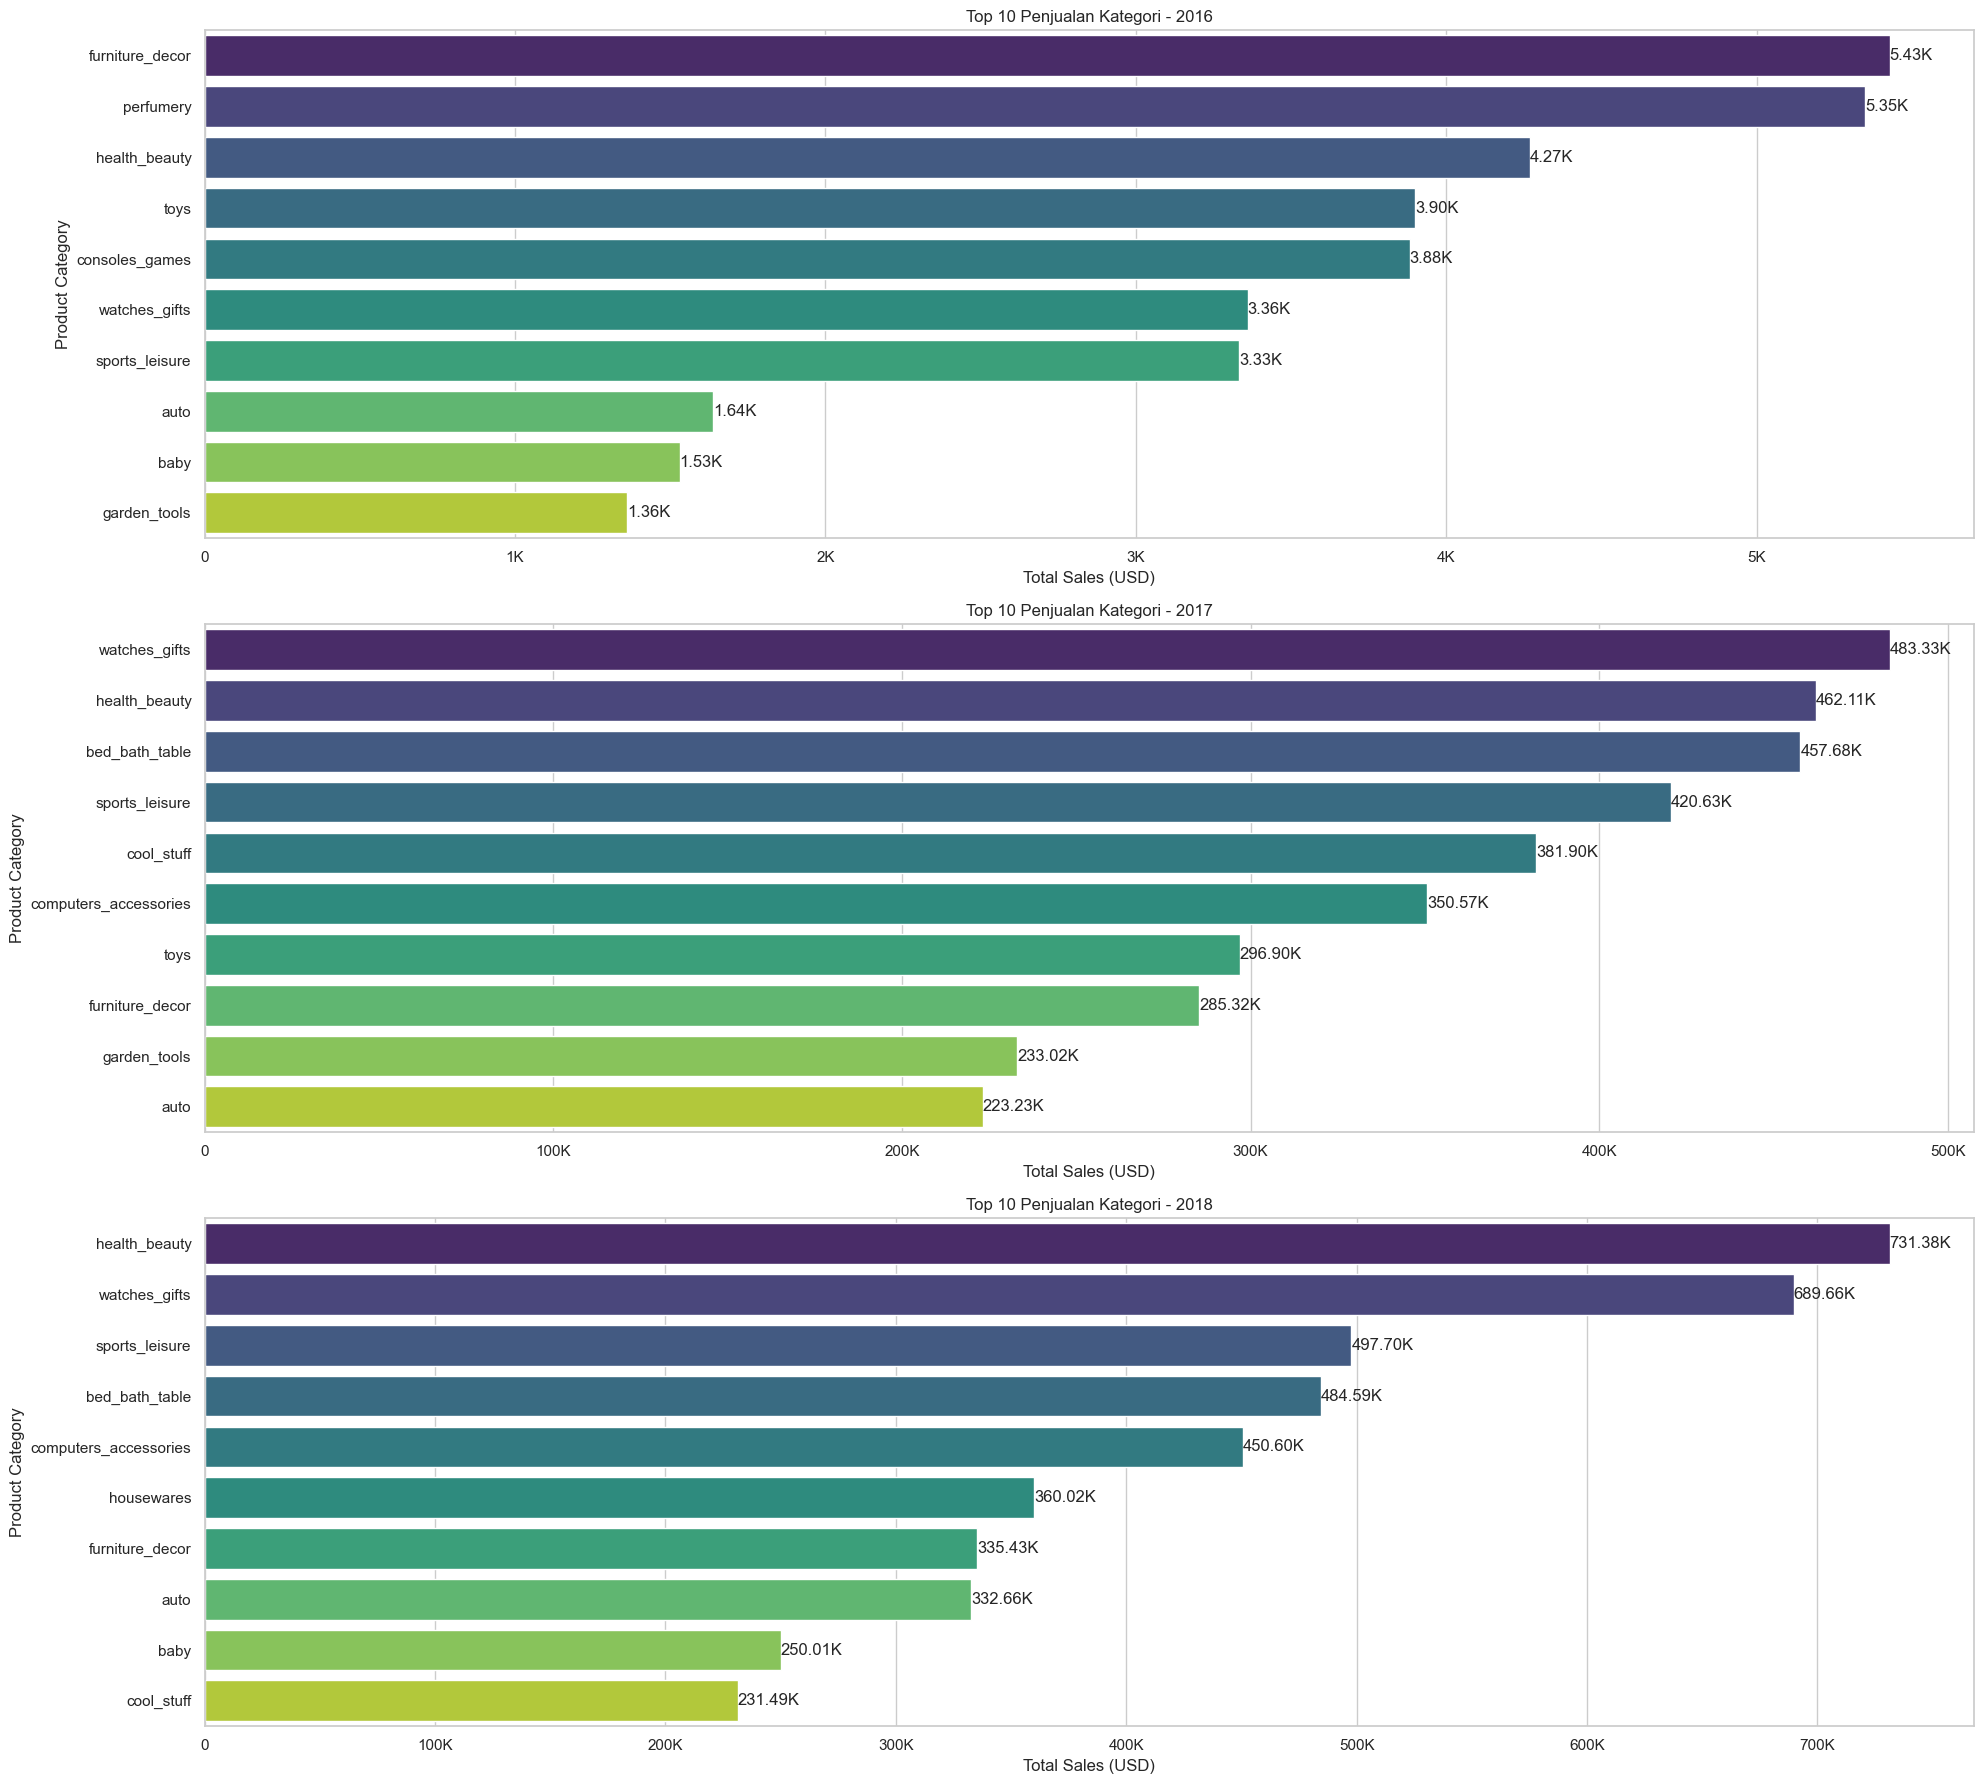

In [160]:
def get_top_data_bar_chart(category_sales_year):
    return {
        year: category_sales_year[category_sales_year['year'] == year]
        .sort_values(by='total_sales', ascending=False)
        .head(10)
        for year in [2016, 2017, 2018]
    }

# Fungsi untuk membuat visualisasi bar plot
def create_barplot(data, year, ax):
    bar_plot = sns.barplot(x='total_sales', y='product_category_name', data=data, ax=ax, palette="viridis", hue='product_category_name', legend=False)
    ax.set_title(f"Top 10 Penjualan Kategori - {year}")
    ax.set_xlabel("Total Sales (USD)")
    ax.set_ylabel("Product Category")
    
    # Menambahkan angka di dekat bar dengan format ribuan (K) dan dua angka desimal
    for p in bar_plot.patches:
        ax.annotate(f'{p.get_width() / 1000:.2f}K', 
                    (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center')

# Format untuk label sumbu X
def thousands_formatter(x, _):
    return f'{int(x / 1000)}K' if x >= 1000 else str(int(x))

# Fungsi untuk membuat visualisasi bar plots
def plot_barplots(top_data):
    fig, axes = plt.subplots(3, 1, figsize=(20, 18))
    
    for i, (year, data) in enumerate(top_data.items()):
        create_barplot(data, year, axes[i])
        axes[i].xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    
    plt.tight_layout()
    plt.show()

# Main execution
top_data = get_top_data_bar_chart(category_sales_year)
plot_barplots(top_data)

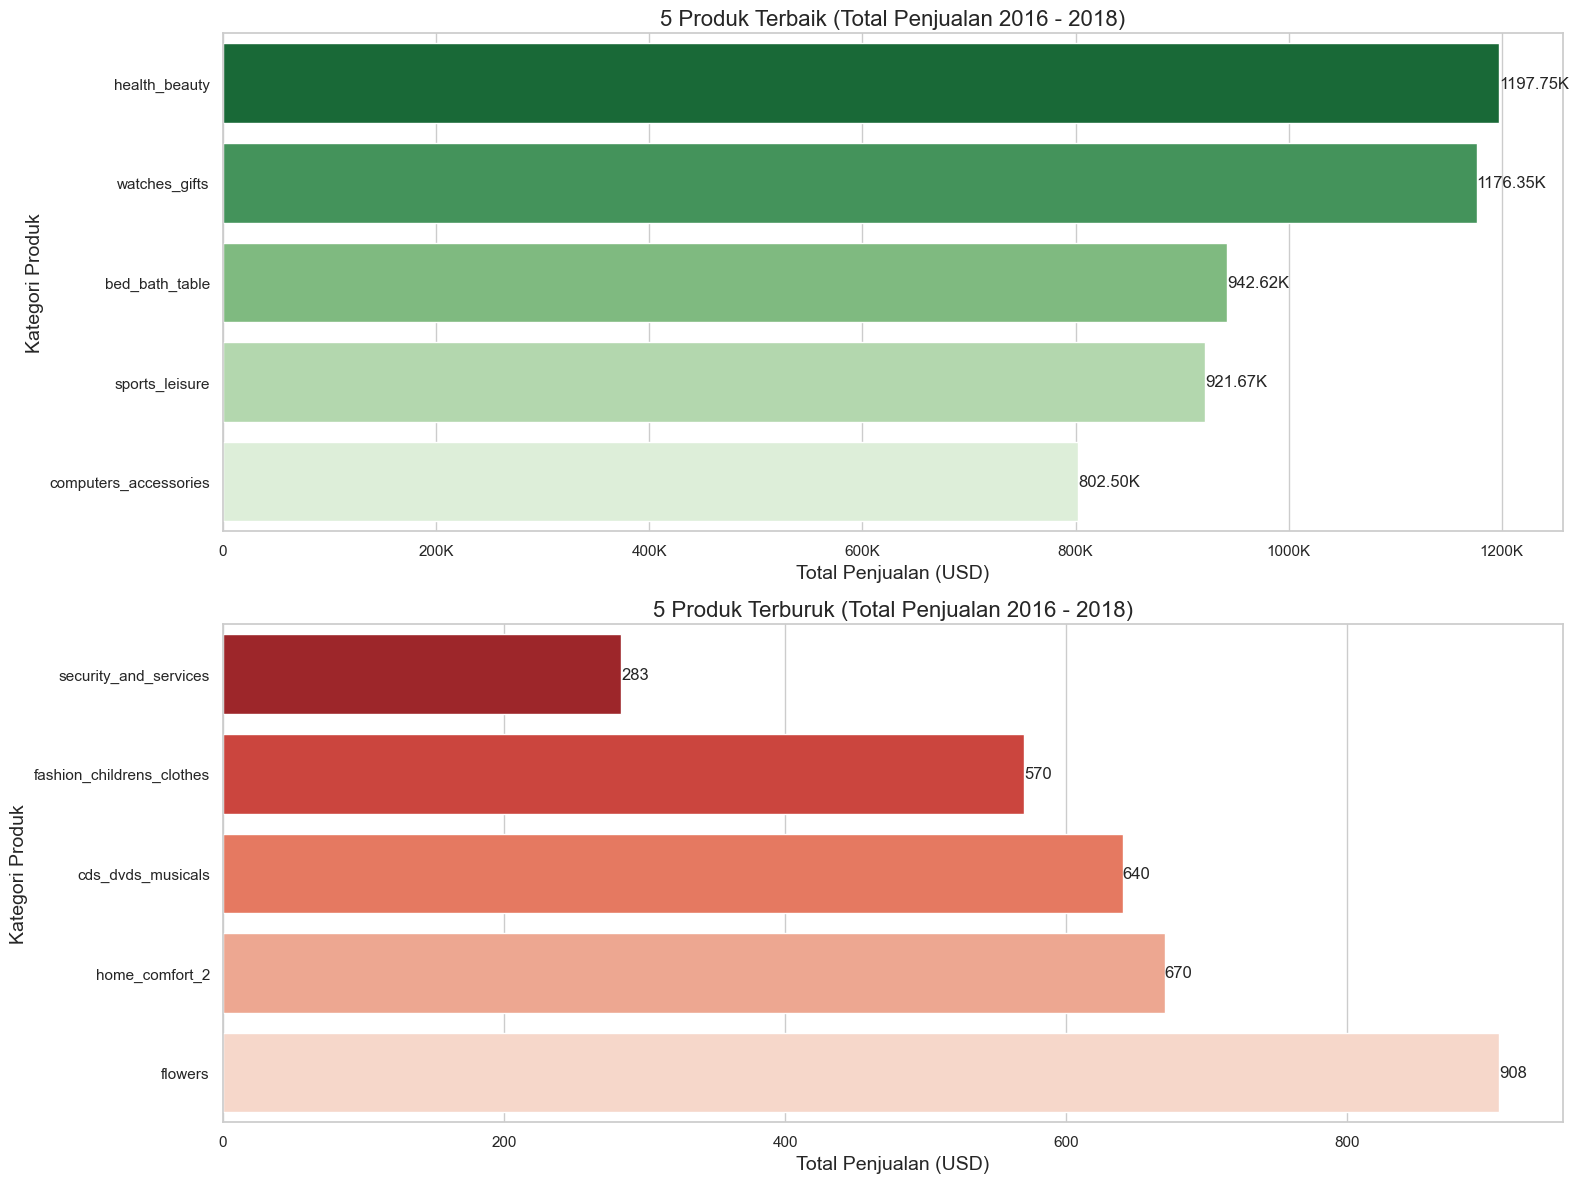

In [161]:
# Menghitung total penjualan per kategori produk dari tahun 2016 hingga 2018
total_sales_by_category = category_sales_year.groupby('product_category_name').agg(
    total_sales=('total_sales', 'sum')
).reset_index()

# Mengurutkan berdasarkan total penjualan
sorted_sales = total_sales_by_category.sort_values(by='total_sales', ascending=False)

# Mengambil 5 produk terbaik dan terburuk
top_5_products = sorted_sales.head(5)
bottom_5_products = sorted_sales.tail(5).sort_values(by='total_sales', ascending=True)

# Format untuk label sumbu X
def thousands_formatter(x, _):
    if x >= 1000:
        return f'{x/1000:.0f}K'
    return str(int(x))

# Visualisasi Produk Terbaik dan Terburuk
fig, ax = plt.subplots(2, 1, figsize=(16, 12))

# Bar plot untuk produk terbaik dengan warna hijau
sns.barplot(data=top_5_products, x='total_sales', y='product_category_name', ax=ax[0], palette="Greens_r", hue='product_category_name', legend=False)
ax[0].set_title("5 Produk Terbaik (Total Penjualan 2016 - 2018)", fontsize=16)
ax[0].set_xlabel("Total Penjualan (USD)", fontsize=14)
ax[0].set_ylabel("Kategori Produk", fontsize=14)
ax[0].xaxis.set_major_formatter(FuncFormatter(thousands_formatter))  # Mengatur format sumbu X
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_width()/1000:.2f}K', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=12)

# Bar plot untuk produk terburuk dengan warna merah
sns.barplot(data=bottom_5_products, x='total_sales', y='product_category_name', ax=ax[1], palette="Reds_r", hue='product_category_name', legend=False)
ax[1].set_title("5 Produk Terburuk (Total Penjualan 2016 - 2018)", fontsize=16)
ax[1].set_xlabel("Total Penjualan (USD)", fontsize=14)
ax[1].set_ylabel("Kategori Produk", fontsize=14)
ax[1].xaxis.set_major_formatter(FuncFormatter(thousands_formatter))  # Mengatur format sumbu X
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=12)

plt.tight_layout()
plt.show()

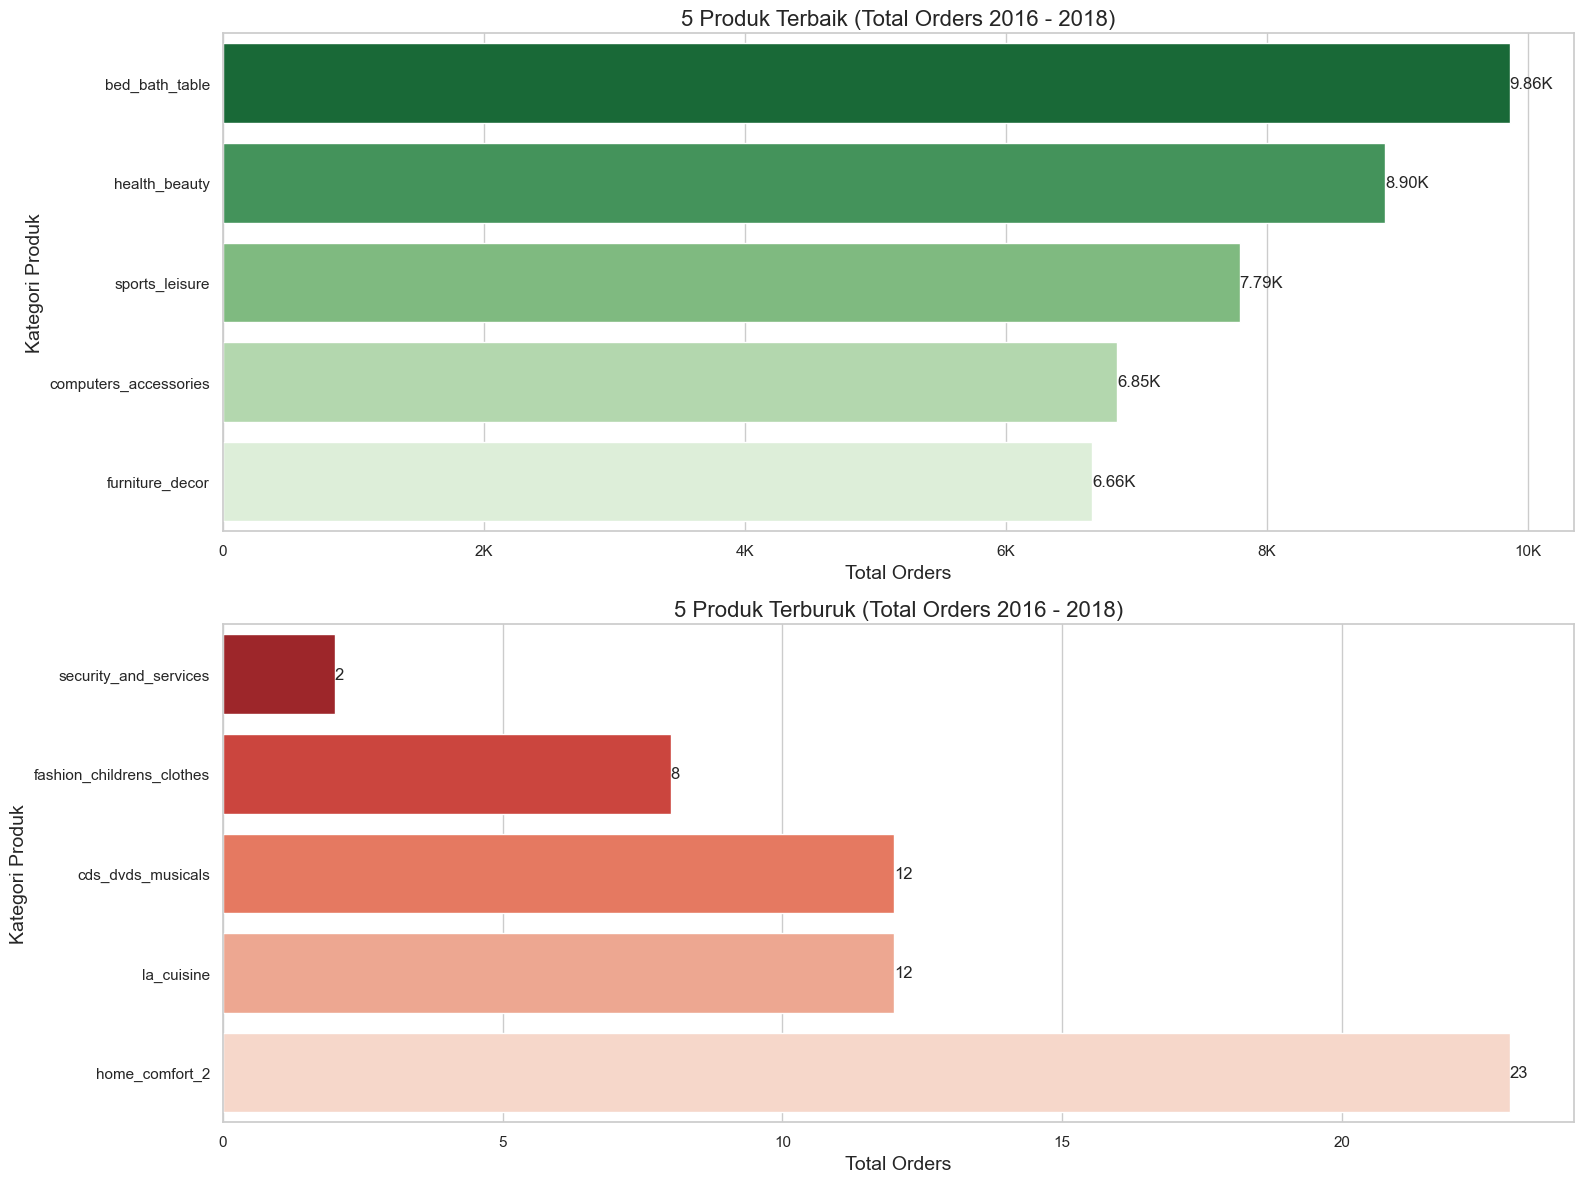

In [163]:
# Menghitung total pesanan per kategori produk dari tahun 2016 hingga 2018
total_orders_by_category = category_sales_year.groupby('product_category_name').agg(
    total_orders=('total_orders', 'sum')  # Ganti 'total_sales' dengan 'total_orders'
).reset_index()

# Mengurutkan berdasarkan total pesanan
sorted_orders = total_orders_by_category.sort_values(by='total_orders', ascending=False)

# Mengambil 5 produk terbaik dan terburuk
top_5_orders = sorted_orders.head(5)
bottom_5_orders = sorted_orders.tail(5).sort_values(by='total_orders', ascending=True)

# Format untuk label sumbu X
def thousands_formatter(x, _):
    if x >= 1000:
        return f'{x/1000:.0f}K'
    return str(int(x))

# Visualisasi Produk Terbaik dan Terburuk
fig, ax = plt.subplots(2, 1, figsize=(16, 12))

# Bar plot untuk produk terbaik dengan warna hijau
sns.barplot(data=top_5_orders, x='total_orders', y='product_category_name', ax=ax[0], palette="Greens_r", hue='product_category_name', legend=False)
ax[0].set_title("5 Produk Terbaik (Total Orders 2016 - 2018)", fontsize=16)
ax[0].set_xlabel("Total Orders", fontsize=14)
ax[0].set_ylabel("Kategori Produk", fontsize=14)
ax[0].xaxis.set_major_formatter(FuncFormatter(thousands_formatter))  # Mengatur format sumbu X
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_width()/1000:.2f}K', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=12)

# Bar plot untuk produk terburuk dengan warna merah
sns.barplot(data=bottom_5_orders, x='total_orders', y='product_category_name', ax=ax[1], palette="Reds_r", hue='product_category_name', legend=False)
ax[1].set_title("5 Produk Terburuk (Total Orders 2016 - 2018)", fontsize=16)
ax[1].set_xlabel("Total Orders", fontsize=14)
ax[1].set_ylabel("Kategori Produk", fontsize=14)
ax[1].xaxis.set_major_formatter(FuncFormatter(thousands_formatter))  # Mengatur format sumbu X
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=12)

plt.tight_layout()
plt.show()


#### Kesimpulan dan Insight
- Kategori produk seperti furniture_decor, health_beauty, dan watches_gifts menunjukkan penjualan yang konsisten tinggi selama tiga tahun berturut-turut.
- Terdapat pergeseran dalam kategori teratas dari tahun ke tahun, dengan beberapa kategori baru muncul dan beberapa kategori yang sebelumnya dominan mulai menurun.
- Produk terburuk seperti security_and_services dan fashion_children_clothes menunjukkan potensi untuk perbaikan, dengan penjualan yang jauh lebih rendah dibandingkan produk terbaik dan menunjukkan bahwa ada masalah dalam menarik pelanggan untuk kategori ini.
- Keterkaitan Antara Penjualan dan Pesanan: Kategori dengan total pesanan tinggi tetapi penjualan rendah mungkin menunjukkan masalah dalam konversi, yang perlu dianalisis lebih lanjut.
- Tren Pertumbuhan: Kategori yang menunjukkan pertumbuhan signifikan dalam penjualan dan pesanan dapat menjadi fokus untuk strategi pemasaran dan pengembangan produk.

#### Rekomendasi

- **Fokus pada Kategori Berkinerja Baik**: Tingkatkan pemasaran untuk kategori yang menunjukkan pertumbuhan, seperti health_beauty dan furniture_decor, untuk memanfaatkan momentum penjualan.
- **Analisis Produk Terburuk**: Lakukan analisis mendalam terhadap produk terburuk untuk memahami penyebab rendahnya penjualan dan pesanan. Pertimbangkan untuk melakukan survei pelanggan untuk mendapatkan umpan balik.
- **Optimalkan Rantai Pasokan**: Pastikan bahwa produk dengan total pesanan tinggi selalu tersedia untuk memenuhi permintaan dan menghindari kehilangan penjualan. - **Analisis 

### Pertanyaan 2: Bagaimana tren penjualan per kategori produk dari tahun 2016 hingga 2018, dan kategori mana yang menunjukkan pertumbuhan paling signifikan?

- **Tujuan**: Memahami kategori produk mana yang paling banyak terjual dan memberikan kontribusi terbesar terhadap total penjualan. Ini memungkinkan perusahaan untuk fokus pada kategori yang memiliki performa terbaik. 
- **Metode**: Menggunakan visualisasi garis untuk menunjukkan tren penjualan per kategori produk tiap tahun. Hasil ini memberikan gambaran yang jelas mengenai kategori produk dengan performa terbaik serta potensi untuk pengembangan lebih lanjut.

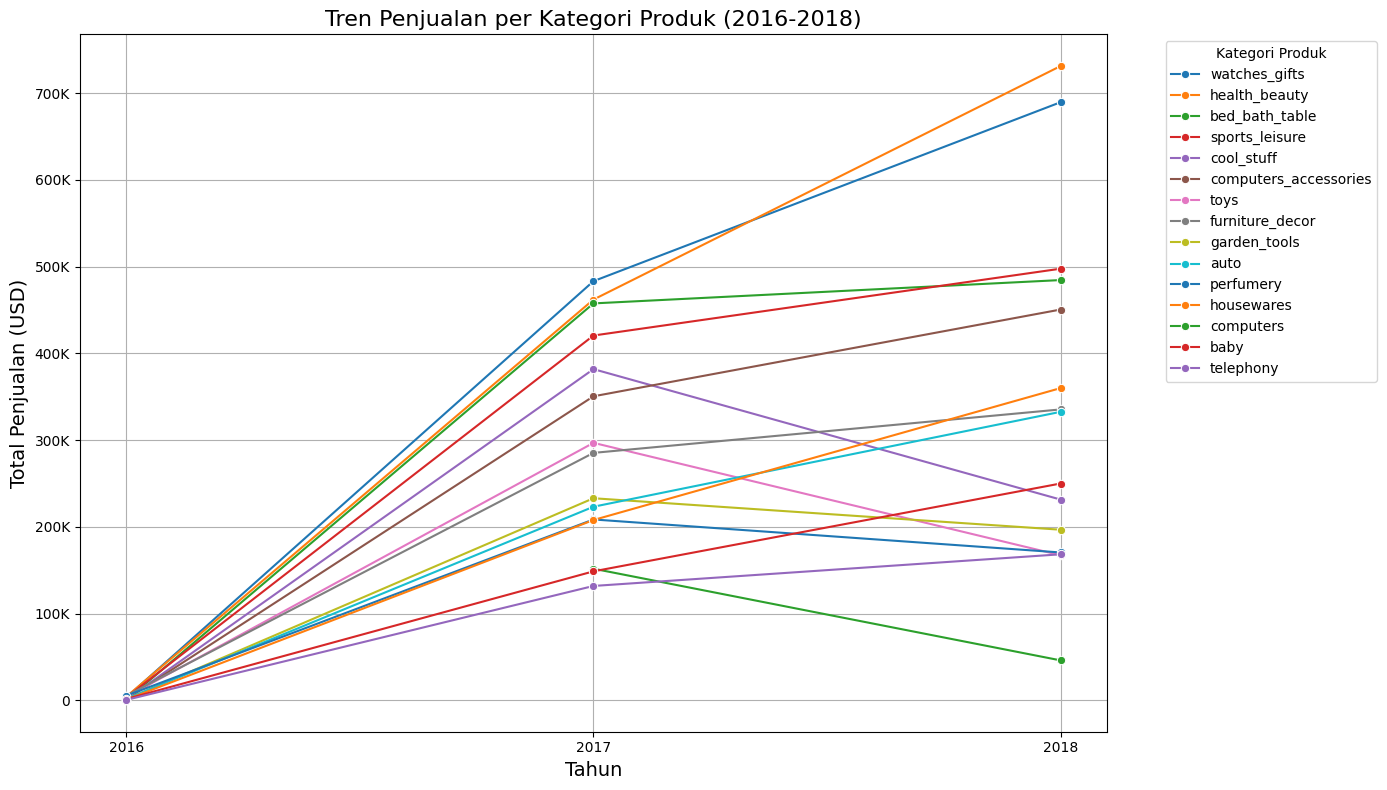

In [117]:
def get_top_data_line_chart(category_sales_year):
    return {
        year: category_sales_year[category_sales_year['year'] == year]
        .sort_values(by='total_sales', ascending=False)
        .head(15)
        for year in [2016, 2017, 2018]
    }

# Fungsi untuk membuat visualisasi line chart
def plot_line_chart(category_sales_year, top_data):
    filtered_combined_data = category_sales_year[category_sales_year['product_category_name'].isin(top_data[2017]['product_category_name'])]
    
    plt.figure(figsize=(14, 8))
    for category in top_data[2017]['product_category_name']:
        category_data = filtered_combined_data[filtered_combined_data['product_category_name'] == category]
        sns.lineplot(data=category_data, x='year', y='total_sales', label=category, marker='o')

    plt.title('Tren Penjualan per Kategori Produk (2016-2018)', fontsize=16)
    plt.xlabel('Tahun', fontsize=14)
    plt.ylabel('Total Penjualan (USD)', fontsize=14)
    
    # Format label sumbu Y untuk menampilkan ribuan (K)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    
    plt.xticks(ticks=[2016, 2017, 2018], labels=[2016, 2017, 2018])
    plt.legend(title='Kategori Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    
    plt.tight_layout()
    plt.show()

# Main execution
top_data = get_top_data_line_chart(category_sales_year)
plot_line_chart(category_sales_year, top_data)

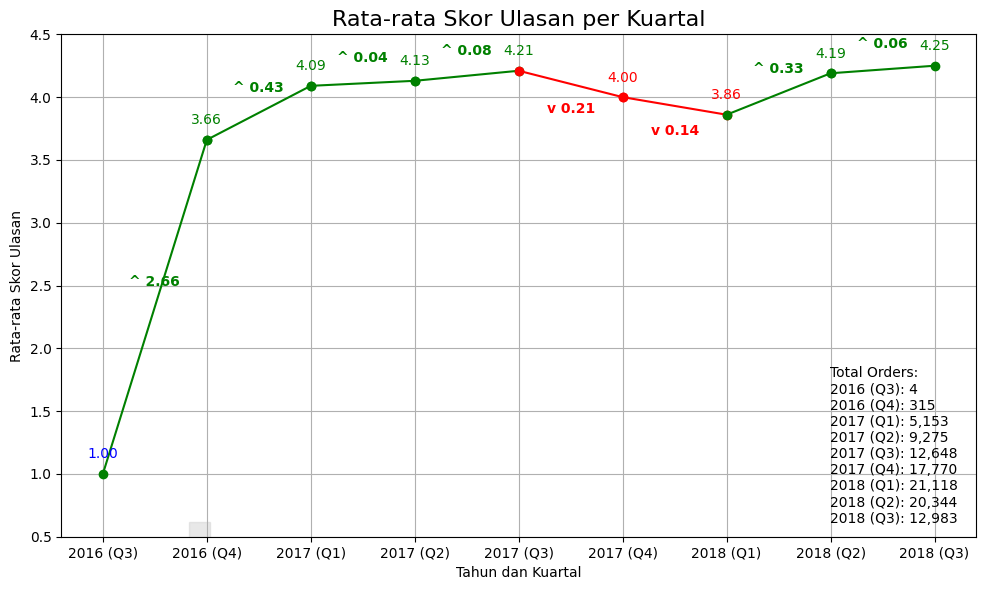

In [118]:
# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Membuat plot dengan warna garis berdasarkan tren
for i in range(1, len(avg_rating_per_quarter)):
    x = avg_rating_per_quarter['year_quarter'].iloc[i-1:i+1]
    y = avg_rating_per_quarter['avg_review_score'].iloc[i-1:i+1]
    
    # Tentukan warna segmen
    color = 'green' if y.iloc[1] > y.iloc[0] else 'red'
    
    # Plot segmen garis
    plt.plot(x, y, marker='o', color=color)
    
    # Menambahkan angka di titik akhir
    plt.text(x.iloc[1], y.iloc[1] + 0.1, f'{y.iloc[1]:.2f}', color=color, ha='center', va='bottom')
    
    # Menambahkan keterangan kenaikan/penurunan
    delta = y.iloc[1] - y.iloc[0]
    symbol = '^' if delta > 0 else 'v'
    mid_x = i - 0.5
    mid_y = (y.iloc[0] + y.iloc[1]) / 2 + (0.2 if delta > 0 else -0.2)  # Atur posisi simbol
    plt.text(mid_x, mid_y, f'{symbol} {abs(delta):.2f}', color=color, ha='center', va='center', fontsize=10, fontweight='bold')

# Menambahkan label untuk titik awal
plt.text(avg_rating_per_quarter['year_quarter'].iloc[0], 
        avg_rating_per_quarter['avg_review_score'].iloc[0] + 0.1, 
        f'{avg_rating_per_quarter["avg_review_score"].iloc[0]:.2f}', 
        color='blue', ha='center', va='bottom')

# Menyusun keterangan total_order
total_orders_text = "Total Orders:\n" + "\n".join(
    f"{avg_rating_per_quarter['year_quarter'].iloc[i]}: {avg_rating_per_quarter['total_order'].iloc[i]:,.0f}"
    for i in range(len(avg_rating_per_quarter))
)

# Menentukan posisi kotak
box_x, box_y, box_width, box_height = 0.83, 0.32, 0.2, 0.3

# Menambahkan kotak di belakang teks
plt.gca().add_patch(patches.Rectangle((box_x, box_y), box_width, box_height, color='lightgrey', alpha=0.5))

# Menampilkan keterangan total orders di dalam kotak
plt.text(box_x + 0.01, box_y + 0.02, total_orders_text, color='black', ha='left', va='top', fontsize=10, transform=plt.gca().transAxes)

# Menambahkan judul dan label
plt.title('Rata-rata Skor Ulasan per Kuartal', fontsize=16)
plt.xlabel('Tahun dan Kuartal')
plt.ylabel('Rata-rata Skor Ulasan')

# Mengatur batas sumbu y
plt.ylim(0.5, 4.5)

# Menambahkan grid
plt.grid(True)

# Menampilkan plot
plt.tight_layout()
plt.show()


#### Produk dengan pertumbuhan paling signifikan adalah bed_bath_table

In [119]:
# Menghitung total penjualan per kategori per tahun
total_sales_per_category = category_sales_monthly.groupby(['year', 'product_category_name'])['total_sales'].sum().reset_index()

# Menghitung total penjualan untuk setiap kategori
sales_summary = total_sales_per_category.pivot(index='product_category_name', columns='year', values='total_sales').reset_index()

# Menghitung pertumbuhan dari 2016 ke 2017 dan dari 2017 ke 2018
sales_summary['growth_2016_2017'] = (sales_summary[2017] - sales_summary[2016]) / sales_summary[2016] * 100
sales_summary['growth_2017_2018'] = (sales_summary[2018] - sales_summary[2017]) / sales_summary[2017] * 100

# Menghitung total pertumbuhan dari 2016 ke 2018
sales_summary['total_growth_2016_2018'] = (sales_summary[2018] - sales_summary[2016]) / sales_summary[2016] * 100

# Menemukan kategori dengan pertumbuhan tertinggi
top_growth_category = sales_summary.loc[sales_summary['total_growth_2016_2018'].idxmax()]

# Menampilkan hasil
top_category_name = top_growth_category['product_category_name']
top_category_growth = top_growth_category['total_growth_2016_2018']
sales_2016 = top_growth_category[2016]
sales_2017 = top_growth_category[2017]
sales_2018 = top_growth_category[2018]

print(f"Kategori dengan pertumbuhan paling signifikan adalah: {top_category_name}")
print(f"Total penjualan:")
print(f" - Tahun 2016: {sales_2016:.2f} USD")
print(f" - Tahun 2017: {sales_2017:.2f} USD")
print(f" - Tahun 2018: {sales_2018:.2f} USD")
print(f"Pertumbuhan dari 2016 ke 2017: {top_growth_category['growth_2016_2017']:.2f}%")
print(f"Pertumbuhan dari 2017 ke 2018: {top_growth_category['growth_2017_2018']:.2f}%")
print(f"Pertumbuhan total dari 2016 ke 2018: {top_category_growth:.2f}%")


Kategori dengan pertumbuhan paling signifikan adalah: bed_bath_table
Total penjualan:
 - Tahun 2016: 359.43 USD
 - Tahun 2017: 457679.02 USD
 - Tahun 2018: 484586.03 USD
Pertumbuhan dari 2016 ke 2017: 127234.67%
Pertumbuhan dari 2017 ke 2018: 5.88%
Pertumbuhan total dari 2016 ke 2018: 134720.70%


In [120]:
# Menghitung total penjualan per kategori per tahun
total_sales_per_category = category_sales_year.groupby(['year', 'product_category_name'])['total_sales'].sum().reset_index()

# Menghitung total penjualan untuk setiap kategori
sales_summary = total_sales_per_category.pivot(index='product_category_name', columns='year', values='total_sales').reset_index()

# Menghitung pertumbuhan penjualan
sales_summary['growth_2016_2017'] = (sales_summary[2017] - sales_summary[2016]) / sales_summary[2016] * 100
sales_summary['growth_2017_2018'] = (sales_summary[2018] - sales_summary[2017]) / sales_summary[2017] * 100
sales_summary['total_growth_2016_2018'] = (sales_summary[2018] - sales_summary[2016]) / sales_summary[2016] * 100

# Menemukan kategori dengan pertumbuhan tertinggi
top_growth_category = sales_summary.loc[sales_summary['total_growth_2016_2018'].idxmax()]

# Memfilter untuk kategori yang diminati
categories_of_interest = ['health_beauty', 'watches_gifts', 'bed_bath_table']
filtered_sales_summary = sales_summary[sales_summary['product_category_name'].isin(categories_of_interest)]

# Menyimpan hasil analisis
results = []
for index, row in filtered_sales_summary.iterrows():
    results.append({
        'category': row['product_category_name'],
        'sales': {year: row[year] for year in [2016, 2017, 2018]},
        'growth': {
            '2016_2017': row['growth_2016_2017'],
            '2017_2018': row['growth_2017_2018'],
            'total': row['total_growth_2016_2018']
        }
    })

# Kesimpulan
conclusion = ""

for result in results:
    conclusion += (
        f"\nKategori: {result['category']}\n"
        f"Total penjualan:\n"
        f" - Tahun 2016: {result['sales'][2016]:.2f} USD\n"
        f" - Tahun 2017: {result['sales'][2017]:.2f} USD\n"
        f" - Tahun 2018: {result['sales'][2018]:.2f} USD\n"
        f"Pertumbuhan dari 2016 ke 2017: {result['growth']['2016_2017']:.2f}%\n"
        f"Pertumbuhan dari 2017 ke 2018: {result['growth']['2017_2018']:.2f}%\n"
        f"Pertumbuhan total dari 2016 ke 2018: {result['growth']['total']:.2f}%\n"
    )

# Menambahkan kategori dengan pertumbuhan paling signifikan di bagian bawah
conclusion += (
    f"\nKategori dengan pertumbuhan paling signifikan adalah: {top_growth_category['product_category_name']} "
    f"dengan pertumbuhan total {top_growth_category['total_growth_2016_2018']:.2f}%.\n"
)

# Menampilkan kesimpulan
print(conclusion)



Kategori: bed_bath_table
Total penjualan:
 - Tahun 2016: 359.43 USD
 - Tahun 2017: 457679.02 USD
 - Tahun 2018: 484586.03 USD
Pertumbuhan dari 2016 ke 2017: 127234.67%
Pertumbuhan dari 2017 ke 2018: 5.88%
Pertumbuhan total dari 2016 ke 2018: 134720.70%

Kategori: health_beauty
Total penjualan:
 - Tahun 2016: 4268.21 USD
 - Tahun 2017: 462105.06 USD
 - Tahun 2018: 731375.54 USD
Pertumbuhan dari 2016 ke 2017: 10726.67%
Pertumbuhan dari 2017 ke 2018: 58.27%
Pertumbuhan total dari 2016 ke 2018: 17035.42%

Kategori: watches_gifts
Total penjualan:
 - Tahun 2016: 3360.24 USD
 - Tahun 2017: 483327.32 USD
 - Tahun 2018: 689661.46 USD
Pertumbuhan dari 2016 ke 2017: 14283.71%
Pertumbuhan dari 2017 ke 2018: 42.69%
Pertumbuhan total dari 2016 ke 2018: 20424.17%

Kategori dengan pertumbuhan paling signifikan adalah: bed_bath_table dengan pertumbuhan total 134720.70%.



Kategori dengan pertumbuhan tertinggi: bed_bath_table dengan pertumbuhan 134720.70%.


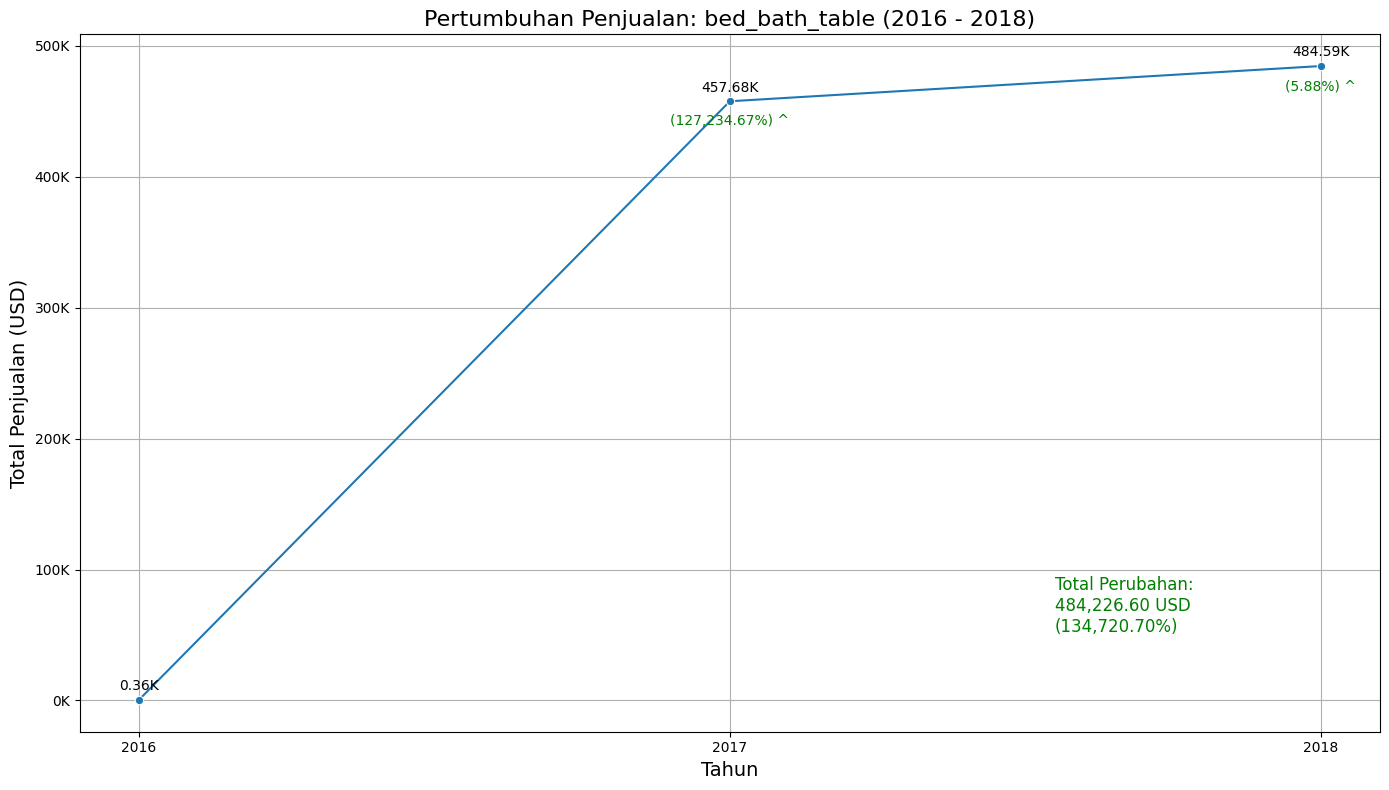

In [121]:
# Fungsi untuk menghitung total penjualan per kategori
def calculate_total_sales(category_sales_year):
    return category_sales_year.groupby('product_category_name').agg({'total_sales': 'sum'}).reset_index()

# Fungsi untuk menghitung pertumbuhan penjualan
def calculate_growth(category_sales_year):
    sales_summary = category_sales_year.pivot(index='product_category_name', columns='year', values='total_sales').reset_index()
    sales_summary['growth'] = (sales_summary[2018] - sales_summary[2016]) / sales_summary[2016] * 100
    return sales_summary

# Fungsi untuk mendapatkan kategori dengan pertumbuhan tertinggi
def get_top_growth_category(sales_summary):
    return sales_summary.loc[sales_summary['growth'].idxmax()]

# Fungsi untuk membuat visualisasi line chart
def plot_growth_line_chart(category_sales_year, top_category):
    filtered_data = category_sales_year[category_sales_year['product_category_name'] == top_category]
    
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=filtered_data, x='year', y='total_sales', marker='o')
    
    plt.title(f'Pertumbuhan Penjualan: {top_category} (2016 - 2018)', fontsize=16)
    plt.xlabel('Tahun', fontsize=14)
    plt.ylabel('Total Penjualan (USD)', fontsize=14)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
    plt.xticks(ticks=[2016, 2017, 2018])
    plt.grid()
    
    # Menambahkan label pada setiap titik
    for i in range(len(filtered_data)):
        x = filtered_data['year'].iloc[i]
        y = filtered_data['total_sales'].iloc[i]
        label = f'{y/1000:,.2f}K'
        plt.text(x, y + 5000, label, ha='center', va='bottom')

        if i > 0:
            previous_y = filtered_data['total_sales'].iloc[i - 1]
            change = ((y - previous_y) / previous_y) * 100
            change_label = f'({change:,.2f}%) {"^" if change > 0 else "v"}'
            plt.text(x, y - 10000, change_label, ha='center', va='top', color='green' if change > 0 else 'red')

    # Menghitung total perubahan dari 2016 ke 2018
    total_2016 = filtered_data[filtered_data['year'] == 2016]['total_sales'].values[0]
    total_2018 = filtered_data[filtered_data['year'] == 2018]['total_sales'].values[0]
    total_change = total_2018 - total_2016
    total_change_percentage = (total_change / total_2016) * 100 if total_2016 != 0 else 0

    # Menampilkan total perubahan tanpa kotak
    plt.text(0.75, 0.18, f'Total Perubahan:\n{total_change:,.2f} USD\n({total_change_percentage:,.2f}%)', 
            ha='left', va='center', fontsize=12, transform=plt.gca().transAxes, color='green')

    plt.tight_layout()
    plt.show()

# Main execution
total_sales = calculate_total_sales(category_sales_year)
sales_summary = calculate_growth(category_sales_year)
top_growth_category = get_top_growth_category(sales_summary)

print(f"Kategori dengan pertumbuhan tertinggi: {top_growth_category['product_category_name']} "
    f"dengan pertumbuhan {top_growth_category['growth']:.2f}%.")

# Visualisasi
plot_growth_line_chart(category_sales_year, top_growth_category['product_category_name'])


#### Kesimpulan dan Insight
- Kategori **bed_bath_table** menunjukkan pertumbuhan yang sangat signifikan, dengan peningkatan penjualan yang dramatis dari tahun 2016 ke 2018.
- Kategori **bed_bath_table** mencatat pertumbuhan total yang luar biasa, dengan peningkatan sebesar **134,720.70%** dari tahun 2016 ke 2018. Ini menunjukkan bahwa kategori ini telah berhasil menarik perhatian konsumen dan meningkatkan penjualannya secara drastis.
- Kategori seperti **watches_gifts** dan **health_beauty** menunjukkan pertumbuhan yang stabil, sementara kategori lain seperti **garden_tools** dan **auto** mengalami variasi yang lebih besar.
- Kategori **health_beauty** dan **watches_gifts** juga menunjukkan pertumbuhan yang baik, tetapi tidak sebanding dengan **bed_bath_table**.

#### Rekomendasi
- **Fokus pada Kategori Berkinerja Tinggi**: Perusahaan harus mempertimbangkan untuk meningkatkan investasi dalam kategori yang menunjukkan pertumbuhan tinggi, seperti bed_bath_table, untuk memanfaatkan momentum ini.
- **Strategi Pemasaran Terintegrasi**: Kembangkan kampanye pemasaran yang terintegrasi untuk kategori yang saling terkait. Misalnya, mempromosikan furniture_decor bersamaan dengan bed_bath_table untuk menarik perhatian konsumen yang mencari solusi lengkap untuk rumah mereka.
- **Inovasi Produk**: Terus berinovasi dalam produk yang ditawarkan, terutama di kategori yang menunjukkan pertumbuhan. Memperkenalkan produk baru atau meningkatkan kualitas produk yang ada dapat membantu mempertahankan dan meningkatkan penjualan.

### Pertanyaan 3: Bagaimana tren penjualan dan rata-rata skor ulasan per bulan dari tahun 2016 hingga 2018, serta bulan mana yang menunjukkan pertumbuhan paling signifikan dalam penjualan pertahun?

- **Tujuan**: Analisis ini bertujuan untuk menilai tren penjualan bulanan dan pola musiman yang terjadi sepanjang tahun. Dengan memetakan performa penjualan dan rata-rata skor ulasan, kita dapat memahami fluktuasi yang terjadi setiap bulan. Selain itu, analisis ini juga bertujuan untuk mengidentifikasi bulan-bulan dengan pertumbuhan penjualan yang paling signifikan, baik positif maupun negatif. Informasi ini sangat berguna untuk perencanaan stok, serta pengembangan strategi pemasaran yang lebih efektif berdasarkan pola penjualan yang ada.
- **Metode**: Untuk menjawab pertanyaan ini, kita memvisualisasikan tren penjualan tiap bulan menggunakan grafik garis, yang memungkinkan kita untuk membandingkan penjualan bulanan antar tahun (2016-2018). Grafik ini akan memberikan gambaran yang jelas tentang pola penjualan musiman dan bagaimana penjualan berkembang sepanjang tahun. Selain itu, dengan menghitung pertumbuhan penjualan bulanan, kita dapat mengidentifikasi bulan-bulan yang menunjukkan perubahan signifikan dalam penjualan. Hasil pertumbuhan penjualan ini kemudian divisualisasikan dalam bentuk grafik batang untuk memudahkan evaluasi tentang bulan-bulan yang mengalami lonjakan atau penurunan tajam, yang mungkin terkait dengan faktor eksternal seperti kampanye pemasaran atau musim tertentu.

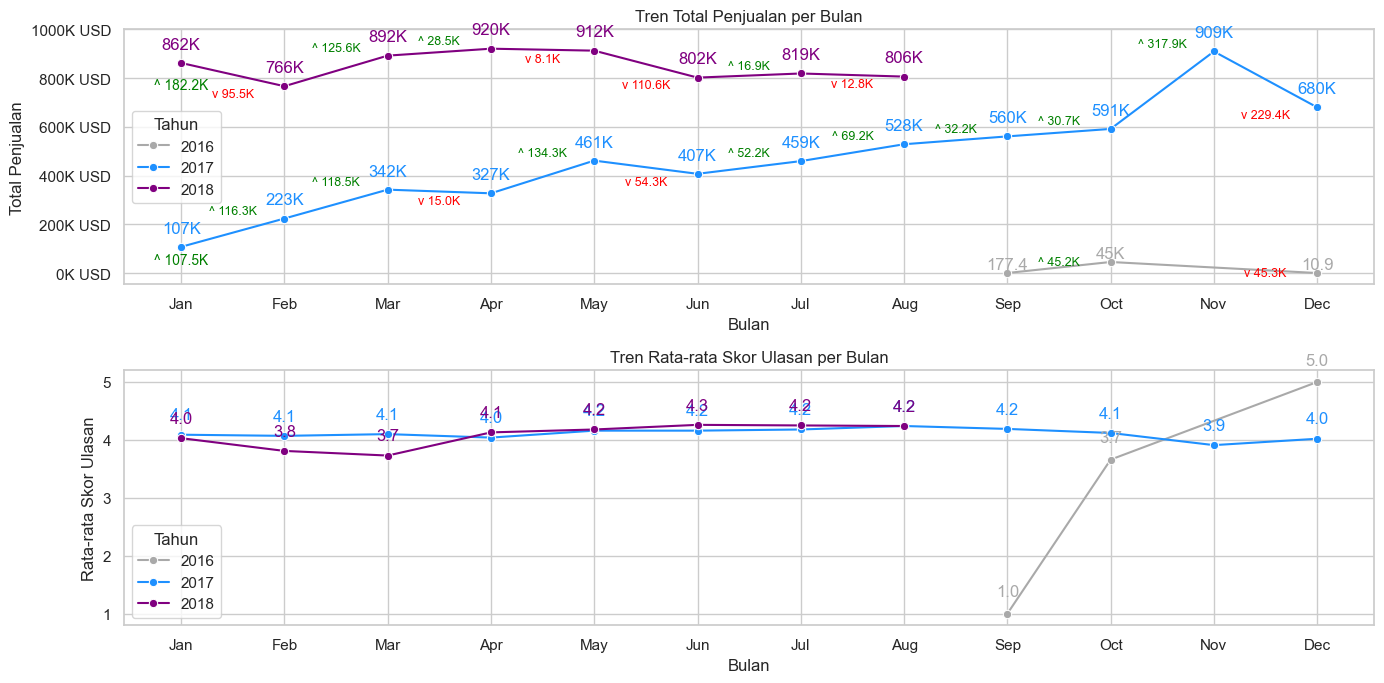

In [122]:
# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Menentukan warna untuk setiap tahun
colors = {
    2016: '#A9A9A9',  # Abu-abu Tua
    2017: '#1E90FF',  # Biru
    2018: '#800080'   # Ungu
}

# Menghapus data untuk bulan September 2018
category_sales_monthly_all_filtered = category_sales_monthly_all[
    ~((category_sales_monthly_all['year'] == 2018) & (category_sales_monthly_all['month'] == 9))
]

# Membuat figure dan axes
plt.figure(figsize=(14, 7))

# Fungsi untuk memplot data
def plot_data_with_or_without_delta(y_col, title, ylabel, include_delta):
    plt.subplot(2, 1, 1 if y_col == 'total_sales' else 2)
    
    for year in colors.keys():
        subset = category_sales_monthly_all_filtered[category_sales_monthly_all_filtered['year'] == year]
        sns.lineplot(data=subset, x='month', y=y_col, label=year, color=colors[year], marker='o')
        
        # Menambahkan angka pada setiap titik
        prev_y = None
        for x, y in zip(subset['month'], subset[y_col]):
            # Menambahkan angka pada setiap titik
            offset = 0.05 * max(subset[y_col])
            text_y = y + offset
            text = f'{int(y/1000)}K' if y_col == 'total_sales' and y >= 1000 else f'{y:.1f}'
            plt.text(x, text_y, text, color=colors[year], ha='center', va='bottom')
            
            # Menambahkan keterangan naik/turun hanya untuk total_sales
            if include_delta and prev_y is not None and y_col == 'total_sales':
                delta = y - prev_y
                symbol = '^' if delta > 0 else 'v'
                delta_text = f'{symbol} {abs(delta)/1000:.1f}K' if abs(delta) >= 1000 else f'{symbol} {abs(delta):.1f}'
                
                # Penempatan simbol dan warna
                delta_y = y + 0.035 * max(subset[y_col]) if delta > 0 else y - 0.035 * max(subset[y_col])
                delta_color = 'green' if delta > 0 else 'red'
                plt.text(x - 0.5, delta_y, delta_text, color=delta_color, ha='center', va='center', fontsize=9)
            prev_y = y

        # Menambahkan keterangan untuk pergantian tahun hanya untuk total_sales
        if include_delta and y_col == 'total_sales' and year > 2016:  # Hanya untuk tahun setelah 2016
            prev_month_value = category_sales_monthly_all_filtered[
                (category_sales_monthly_all_filtered['year'] == year - 1) & 
                (category_sales_monthly_all_filtered['month'] == 12)
            ][y_col].values[0]
            current_month_value = subset[subset['month'] == 1][y_col].values[0]
            delta = current_month_value - prev_month_value
            symbol = '^' if delta > 0 else 'v'
            delta_color = 'green' if delta > 0 else 'red'
            plt.text(1, (prev_month_value + current_month_value) / 2 + (0.1 if delta > 0 else -0.1), 
                    f'{symbol} {abs(delta)/1000:.1f}K', color=delta_color, ha='center', va='center', fontsize=10)

    plt.title(title)
    plt.xlabel('Bulan')
    plt.ylabel(ylabel)
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(title='Tahun')

    # Menambahkan label untuk sumbu y
    if y_col == 'total_sales':
        plt.yticks([0, 200000, 400000, 600000, 800000, 1000000], 
                ['0K USD', '200K USD', '400K USD', '600K USD', '800K USD', '1000K USD'])

# Plot total_sales dengan delta
plot_data_with_or_without_delta('total_sales', 'Tren Total Penjualan per Bulan', 'Total Penjualan', include_delta=True)

# Plot avg_review_score tanpa delta
plot_data_with_or_without_delta('avg_review_score', 'Tren Rata-rata Skor Ulasan per Bulan', 'Rata-rata Skor Ulasan', include_delta=False)

# Menampilkan plot
plt.tight_layout()
plt.show()


#### Menghapuskan tahun 2016 dikarenakan data tidak lengkap sehingga dapat memengaruhi analisis

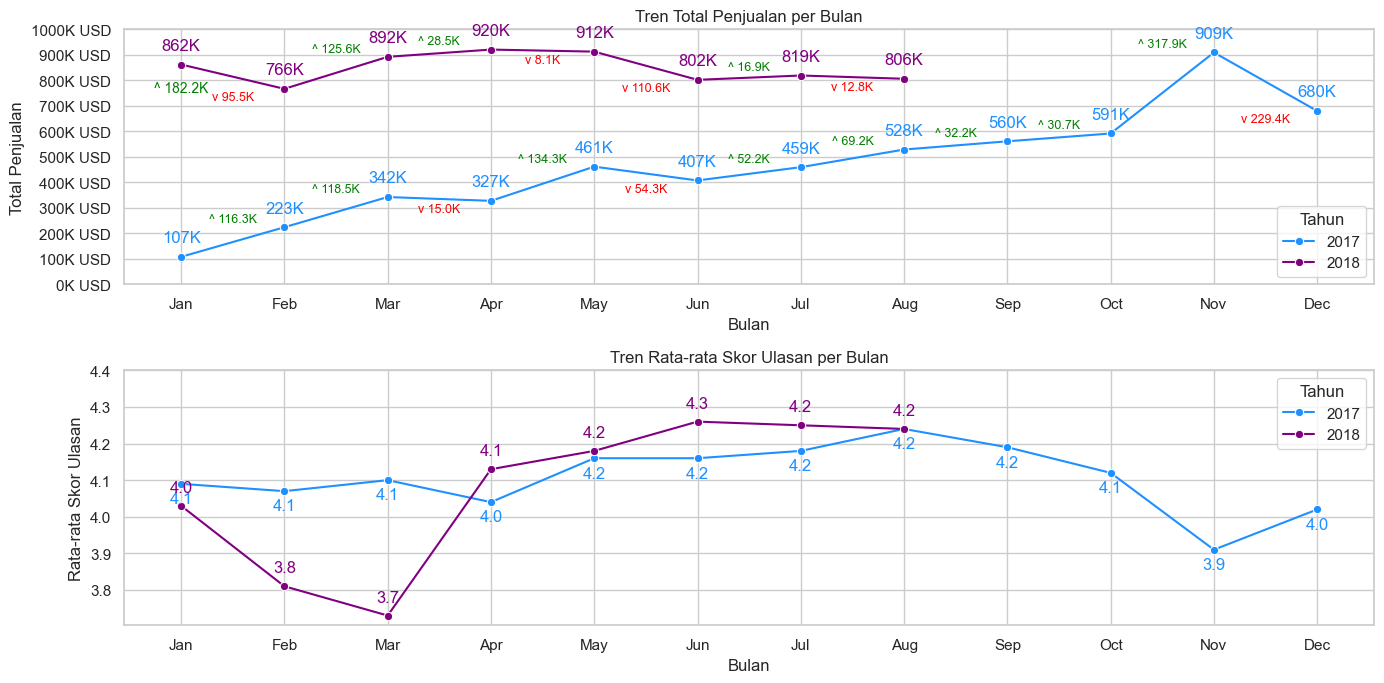

In [123]:
# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Menentukan warna untuk setiap tahun
colors = {
    2017: '#1E90FF',  # Biru
    2018: '#800080'   # Ungu
}

# Menghapus data untuk tahun 2016 dan bulan September 2018
category_sales_monthly_all_filtered = category_sales_monthly_all[
    (category_sales_monthly_all['year'] != 2016) & 
    ~((category_sales_monthly_all['year'] == 2018) & (category_sales_monthly_all['month'] == 9))
]

# Membuat figure dan axes
plt.figure(figsize=(14, 7))

# Fungsi untuk memplot data
def plot_data_with_or_without_delta(y_col, title, ylabel, include_delta, is_sales_plot=True):
    plt.subplot(2, 1, 1 if y_col == 'total_sales' else 2)
    
    for year in colors.keys():
        subset = category_sales_monthly_all_filtered[category_sales_monthly_all_filtered['year'] == year]
        sns.lineplot(data=subset, x='month', y=y_col, label=year, color=colors[year], marker='o')
        
        # Menambahkan angka pada setiap titik
        prev_y = None
        for x, y in zip(subset['month'], subset[y_col]):
            if is_sales_plot:  # Untuk total penjualan
                offset = 0.05 * max(subset[y_col])
                text_y = y + offset
                va = 'bottom'  # Vertical alignment untuk di atas
            else:  # Untuk rata-rata skor ulasan
                if year == 2018:  # Untuk tahun 2018 (ungu)
                    offset = 0.03  # Angka di atas garis
                    text_y = y + offset
                    va = 'bottom'
                else:  # Untuk tahun 2017 (biru)
                    offset = -0.02  # Angka di bawah garis
                    text_y = y + offset
                    va = 'top'
            
            text = f'{int(y/1000)}K' if y_col == 'total_sales' and y >= 1000 else f'{y:.1f}'
            plt.text(x, text_y, text, color=colors[year], ha='center', va=va)
            
            # Menambahkan keterangan naik/turun hanya untuk total_sales
            if include_delta and prev_y is not None and y_col == 'total_sales':
                delta = y - prev_y
                symbol = '^' if delta > 0 else 'v'
                delta_text = f'{symbol} {abs(delta)/1000:.1f}K' if abs(delta) >= 1000 else f'{symbol} {abs(delta):.1f}'
                
                # Penempatan simbol dan warna
                delta_y = y + 0.035 * max(subset[y_col]) if delta > 0 else y - 0.035 * max(subset[y_col])
                delta_color = 'green' if delta > 0 else 'red'
                plt.text(x - 0.5, delta_y, delta_text, color=delta_color, ha='center', va='center', fontsize=9)
            prev_y = y

        # Menambahkan keterangan untuk pergantian tahun hanya untuk total_sales
        if include_delta and y_col == 'total_sales' and year == 2018:  # Hanya untuk tahun 2018
            if not subset[subset['month'] == 1].empty:  # Pastikan ada data untuk bulan Januari
                current_month_value = subset[subset['month'] == 1][y_col].values[0]
                prev_month_value = category_sales_monthly_all_filtered[
                    (category_sales_monthly_all_filtered['year'] == year - 1) & 
                    (category_sales_monthly_all_filtered['month'] == 12)
                ]
                if not prev_month_value.empty:  # Pastikan ada data untuk bulan Desember
                    prev_month_value = prev_month_value[y_col].values[0]
                    delta = current_month_value - prev_month_value
                    symbol = '^' if delta > 0 else 'v'
                    delta_color = 'green' if delta > 0 else 'red'
                    plt.text(1, (prev_month_value + current_month_value) / 2 + (0.1 if delta > 0 else -0.1), 
                            f'{symbol} {abs(delta)/1000:.1f}K', color=delta_color, ha='center', va='center', fontsize=10)

    plt.title(title)
    plt.xlabel('Bulan')
    plt.ylabel(ylabel)
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(title='Tahun')

    # Menambahkan label untuk sumbu y
    if y_col == 'total_sales':
        plt.yticks([0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000], 
                ['0K USD', '100K USD', '200K USD', '300K USD', '400K USD', '500K USD', '600K USD', '700K USD', '800K USD', '900K USD', '1000K USD'])

    # Menambahkan label untuk sumbu y
    if y_col == 'avg_review_score':
        plt.yticks([3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4],
                ['3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4'])

# Plot total_sales dengan delta
plot_data_with_or_without_delta('total_sales', 'Tren Total Penjualan per Bulan', 'Total Penjualan', include_delta=True, is_sales_plot=True)

# Plot avg_review_score tanpa delta
plot_data_with_or_without_delta('avg_review_score', 'Tren Rata-rata Skor Ulasan per Bulan', 'Rata-rata Skor Ulasan', include_delta=False, is_sales_plot=False)

# Menampilkan plot
plt.tight_layout()
plt.show()


In [124]:
# Menghapus data untuk tahun 2016 dan bulan September 2018
category_sales_monthly_all_filtered = category_sales_monthly_all[
    (category_sales_monthly_all['year'] != 2016) & 
    ~((category_sales_monthly_all['year'] == 2018) & (category_sales_monthly_all['month'] == 9))
]

# Menghitung pertumbuhan total penjualan
sales_growth = category_sales_monthly_all_filtered.groupby(['year', 'month'])['total_sales'].sum().reset_index()
sales_growth['sales_growth'] = sales_growth['total_sales'].pct_change() * 100  # Persentase pertumbuhan

# Mengatur pertumbuhan di Januari 2017 menjadi 0% bukan NaN%
sales_growth.loc[(sales_growth['year'] == 2017) & (sales_growth['month'] == 1), 'sales_growth'] = 0

sales_growth['sales_growth'] = sales_growth['sales_growth'].round(2).astype(str) + '%'  # Format persen

# Menambahkan kolom untuk perubahan penjualan
sales_growth['sales_change'] = sales_growth['total_sales'].diff()
sales_growth.loc[0, 'sales_change'] = None  # Mengatur nilai NaN untuk baris pertama

# Menentukan tren penjualan
sales_growth['sales_trend'] = sales_growth['sales_change'].apply(
    lambda x: 'Stabil' if pd.isna(x) else ('Naik' if x > 0 else 'Turun')
)

# Menghitung pertumbuhan rata-rata skor ulasan
review_growth = category_sales_monthly_all_filtered.groupby(['year', 'month'])['avg_review_score'].mean().reset_index()
review_growth['review_growth'] = review_growth['avg_review_score'].pct_change() * 100  # Persentase pertumbuhan
review_growth['review_growth'] = review_growth['review_growth'].round(2).astype(str) + '%'  # Format persen

# Menentukan bulan dan tahun dengan pertumbuhan tertinggi
max_sales_growth = sales_growth.loc[sales_growth['sales_growth'].replace("NaN", "0%").str.rstrip('%').astype(float).idxmax()]
max_review_growth = review_growth.loc[review_growth['review_growth'].replace("NaN", "0%").str.rstrip('%').astype(float).idxmax()]



In [125]:
print(f"\nBulan dan Tahun dengan Pertumbuhan Total Penjualan Tertinggi: {max_sales_growth['month']}/{max_sales_growth['year']} dengan pertumbuhan {max_sales_growth['sales_growth']}")
print("Pertumbuhan Total Penjualan:")
print(sales_growth)


Bulan dan Tahun dengan Pertumbuhan Total Penjualan Tertinggi: 2/2017 dengan pertumbuhan 108.16%
Pertumbuhan Total Penjualan:
    year  month  total_sales sales_growth  sales_change sales_trend
0   2017      1    107505.11         0.0%           NaN      Stabil
1   2017      2    223785.69      108.16%     116280.58        Naik
2   2017      3    342263.23       52.94%     118477.54        Naik
3   2017      4    327253.34       -4.39%     -15009.89       Turun
4   2017      5    461510.58       41.03%     134257.24        Naik
5   2017      6    407256.06      -11.76%     -54254.52       Turun
6   2017      7    459423.00       12.81%      52166.94        Naik
7   2017      8    528625.13       15.06%      69202.13        Naik
8   2017      9    560870.55         6.1%      32245.42        Naik
9   2017     10    591574.74        5.47%      30704.19        Naik
10  2017     11    909505.84       53.74%     317931.10        Naik
11  2017     12    680101.55      -25.22%    -229404.29   

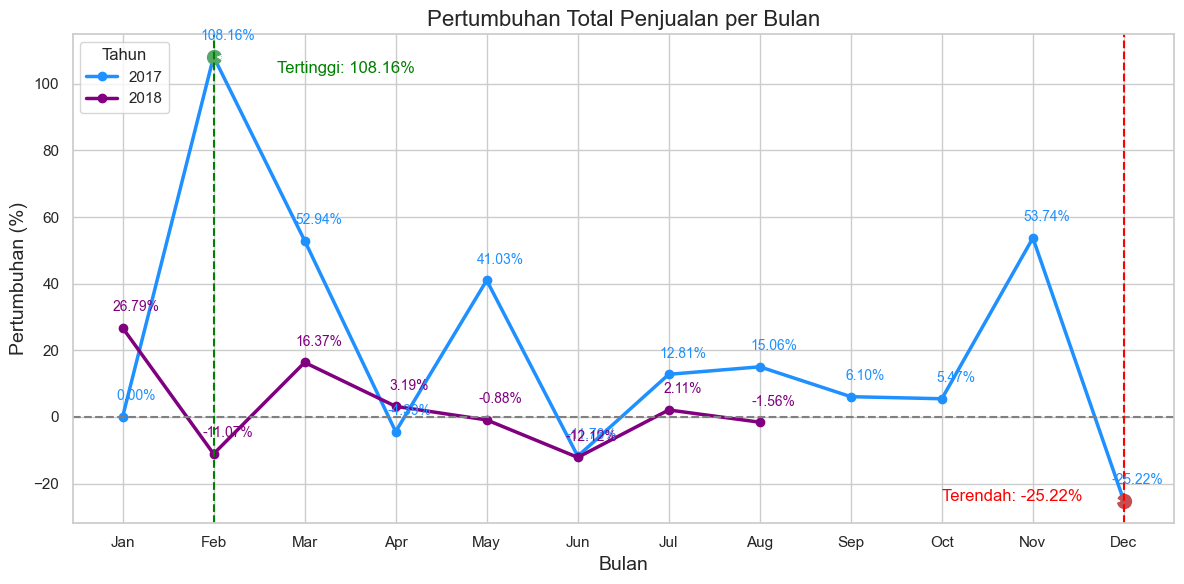

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menghapus data untuk tahun 2016 dan bulan September 2018
category_sales_monthly_all_filtered = category_sales_monthly_all[
    (category_sales_monthly_all['year'] != 2016) & 
    ~((category_sales_monthly_all['year'] == 2018) & (category_sales_monthly_all['month'] == 9))
]

# Menghitung pertumbuhan total penjualan
sales_growth = category_sales_monthly_all_filtered.groupby(['year', 'month'])['total_sales'].sum().reset_index()
sales_growth['sales_growth'] = sales_growth['total_sales'].pct_change() * 100
sales_growth.loc[(sales_growth['year'] == 2017) & (sales_growth['month'] == 1), 'sales_growth'] = 0

# Menambahkan kolom untuk perubahan penjualan
sales_growth['sales_change'] = sales_growth['total_sales'].diff()
sales_growth.loc[0, 'sales_change'] = None

# Menentukan warna untuk setiap tahun
colors = {2017: '#1E90FF', 2018: '#800080'}

# Visualisasi pertumbuhan total penjualan
plt.figure(figsize=(12, 6))
for year in colors.keys():
    year_data = sales_growth[sales_growth['year'] == year]
    plt.plot(year_data['month'], year_data['sales_growth'], marker='o', color=colors[year], linewidth=2.5, label=year)

plt.title('Pertumbuhan Total Penjualan per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Pertumbuhan (%)', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title='Tahun')

# Menambahkan label di setiap titik
for index, row in sales_growth.iterrows():
    plt.annotate(f'{row["sales_growth"]:.2f}%', 
                (row['month'], row['sales_growth']),
                textcoords="offset points", 
                xytext=(10, 12), 
                ha='center', 
                fontsize=10, 
                color=colors[row['year']])

# Menambahkan garis dan label untuk pertumbuhan tertinggi
max_growth_index = sales_growth['sales_growth'].idxmax()
max_growth_value = sales_growth['sales_growth'].iloc[max_growth_index]
max_growth_month = sales_growth['month'].iloc[max_growth_index]

plt.plot(max_growth_month, max_growth_value, 'go', markersize=10)
plt.axvline(x=max_growth_month, color='green', linestyle='--', label='Pertumbuhan Tertinggi')
plt.annotate(f'Tertinggi: {max_growth_value:.2f}%', 
            xy=(max_growth_month, max_growth_value), 
            xytext=(max_growth_month + 0.7, max_growth_value - 5),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=12, color='green')

# Menambahkan garis dan label untuk pertumbuhan terendah
min_growth_index = sales_growth['sales_growth'].idxmin()
min_growth_value = sales_growth['sales_growth'].iloc[min_growth_index]
min_growth_month = sales_growth['month'].iloc[min_growth_index]

plt.plot(min_growth_month, min_growth_value, 'ro', markersize=10)
plt.axvline(x=min_growth_month, color='red', linestyle='--', label='Pertumbuhan Terendah')
plt.annotate(f'Terendah: {min_growth_value:.2f}%', 
            xy=(min_growth_month, min_growth_value), 
            xytext=(min_growth_month - 2, min_growth_value + 0),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=12, color='red')

plt.tight_layout()
plt.show()

In [127]:
print(f"Bulan dan Tahun dengan Pertumbuhan Rata-rata Skor Ulasan Tertinggi: {max_review_growth['month']}/{max_review_growth['year']} dengan pertumbuhan {max_review_growth['review_growth']}")
print("\nPertumbuhan Rata-rata Skor Ulasan:")
print(review_growth)

Bulan dan Tahun dengan Pertumbuhan Rata-rata Skor Ulasan Tertinggi: 4/2018 dengan pertumbuhan 10.72%

Pertumbuhan Rata-rata Skor Ulasan:
    year  month  avg_review_score review_growth
0   2017      1              4.09          nan%
1   2017      2              4.07        -0.49%
2   2017      3              4.10         0.74%
3   2017      4              4.04        -1.46%
4   2017      5              4.16         2.97%
5   2017      6              4.16          0.0%
6   2017      7              4.18         0.48%
7   2017      8              4.24         1.44%
8   2017      9              4.19        -1.18%
9   2017     10              4.12        -1.67%
10  2017     11              3.91         -5.1%
11  2017     12              4.02         2.81%
12  2018      1              4.03         0.25%
13  2018      2              3.81        -5.46%
14  2018      3              3.73         -2.1%
15  2018      4              4.13        10.72%
16  2018      5              4.18         1.21%

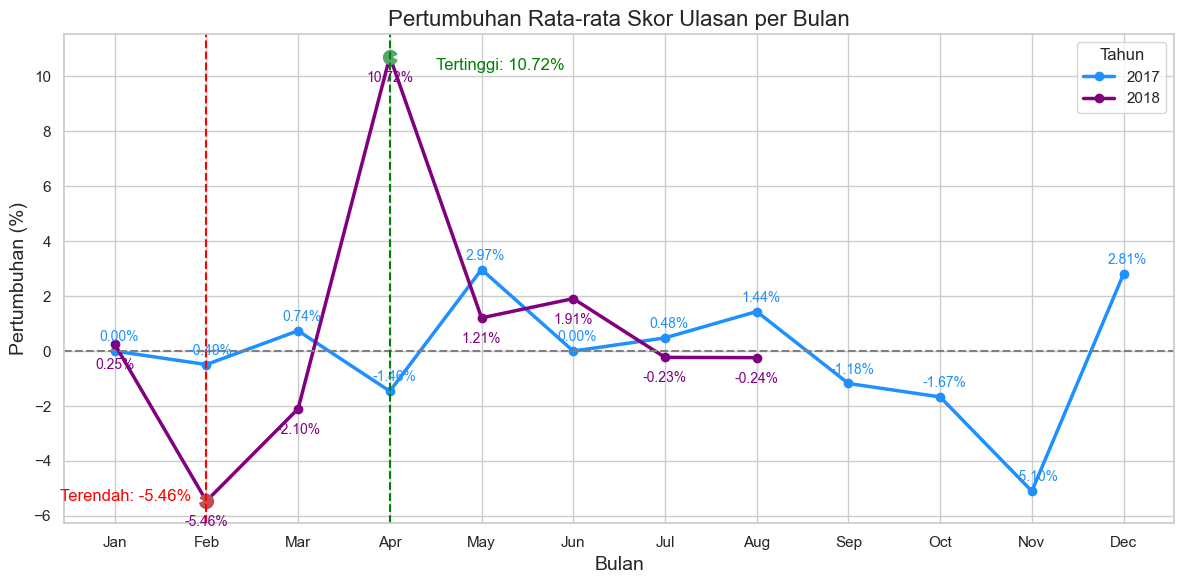

In [128]:
# Menghapus data untuk tahun 2016 dan bulan September 2018
category_sales_monthly_all_filtered = category_sales_monthly_all[
    (category_sales_monthly_all['year'] != 2016) & 
    ~((category_sales_monthly_all['year'] == 2018) & (category_sales_monthly_all['month'] == 9))
]

# Menghitung pertumbuhan rata-rata skor ulasan
review_growth = category_sales_monthly_all_filtered.groupby(['year', 'month'])['avg_review_score'].mean().reset_index()
review_growth['review_growth'] = review_growth['avg_review_score'].pct_change() * 100
review_growth.loc[(review_growth['year'] == 2017) & (review_growth['month'] == 1), 'review_growth'] = 0
review_growth['review_growth'] = review_growth['review_growth'].round(2)

# Menentukan warna untuk setiap tahun
colors = {2017: '#1E90FF', 2018: '#800080'}

# Visualisasi pertumbuhan rata-rata skor ulasan
plt.figure(figsize=(12, 6))
for year in colors.keys():
    year_data = review_growth[review_growth['year'] == year]
    plt.plot(year_data['month'], year_data['review_growth'], marker='o', color=colors[year], linewidth=2.5, label=year)

plt.title('Pertumbuhan Rata-rata Skor Ulasan per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Pertumbuhan (%)', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title='Tahun')

# Menambahkan label di setiap titik dengan posisi yang berbeda untuk tahun 2017 dan 2018
for index, row in review_growth.iterrows():
    xytext = (3, 7) if row['year'] == 2017 else (0, -18)  # Posisi label untuk tahun 2018
    plt.annotate(f'{row["review_growth"]:.2f}%', 
                (row['month'], row['review_growth']),
                textcoords="offset points", 
                xytext=xytext, 
                ha='center', 
                fontsize=10, 
                color=colors[row['year']])

# Menambahkan garis dan label untuk pertumbuhan tertinggi
max_growth_index = review_growth['review_growth'].idxmax()
max_growth_value = review_growth['review_growth'].iloc[max_growth_index]
max_growth_month = review_growth['month'].iloc[max_growth_index]

plt.plot(max_growth_month, max_growth_value, 'go', markersize=10)
plt.axvline(x=max_growth_month, color='green', linestyle='--', label='Pertumbuhan Tertinggi')
plt.annotate(f'Tertinggi: {max_growth_value:.2f}%',
            xy=(max_growth_month, max_growth_value),
            xytext=(max_growth_month + 0.5, max_growth_value - 0.5),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=12, color='green')

# Menambahkan garis dan label untuk pertumbuhan terendah
min_growth_index = review_growth['review_growth'].idxmin()
min_growth_value = review_growth['review_growth'].iloc[min_growth_index]
min_growth_month = review_growth['month'].iloc[min_growth_index]

plt.plot(min_growth_month, min_growth_value, 'ro', markersize=10)
plt.axvline(x=min_growth_month, color='red', linestyle='--', label='Pertumbuhan Terendah')
plt.annotate(f'Terendah: {min_growth_value:.2f}%', 
            xy=(min_growth_month, min_growth_value), 
            xytext=(min_growth_month - 1.6, min_growth_value + 0), 
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=12, color='red')

plt.tight_layout()
plt.show()

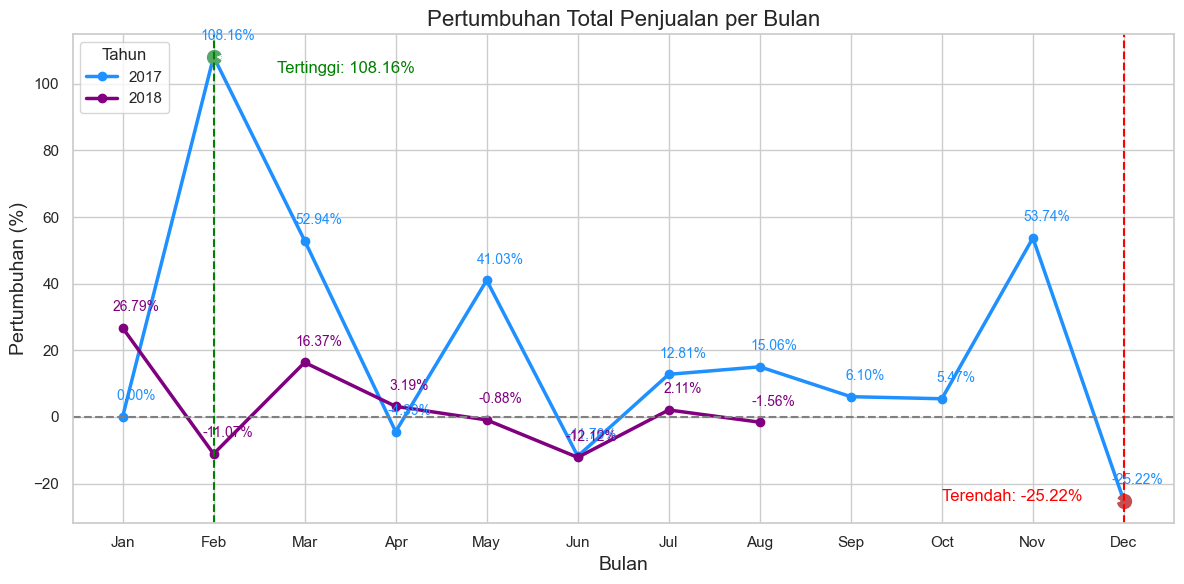

In [129]:
# Menghapus data untuk tahun 2016 dan bulan September 2018
category_sales_monthly_all_filtered = category_sales_monthly_all[
    (category_sales_monthly_all['year'] != 2016) & 
    ~((category_sales_monthly_all['year'] == 2018) & (category_sales_monthly_all['month'] == 9))
]

# Menghitung pertumbuhan total penjualan
sales_growth = category_sales_monthly_all_filtered.groupby(['year', 'month'])['total_sales'].sum().reset_index()
sales_growth['sales_growth'] = sales_growth['total_sales'].pct_change() * 100  # Persentase pertumbuhan

# Mengatur pertumbuhan di Januari 2017 menjadi 0% bukan NaN%
sales_growth.loc[(sales_growth['year'] == 2017) & (sales_growth['month'] == 1), 'sales_growth'] = 0

# Menambahkan kolom untuk perubahan penjualan
sales_growth['sales_change'] = sales_growth['total_sales'].diff()
sales_growth.loc[0, 'sales_change'] = None  # Mengatur nilai NaN untuk baris pertama

# Menentukan tren penjualan
sales_growth['sales_trend'] = sales_growth['sales_change'].apply(
    lambda x: 'Stabil' if pd.isna(x) else ('Naik' if x > 0 else 'Turun')
)

# Menentukan warna untuk setiap tahun
colors = {
    2017: '#1E90FF',  # Biru
    2018: '#800080'   # Ungu
}

# Visualisasi pertumbuhan total penjualan
plt.figure(figsize=(12, 6))
for year in colors.keys():
    year_data = sales_growth[sales_growth['year'] == year]
    plt.plot(year_data['month'], year_data['sales_growth'], marker='o', color=colors[year], linewidth=2.5, label=year)

plt.title('Pertumbuhan Total Penjualan per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Pertumbuhan (%)', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.axhline(0, color='gray', linestyle='--')  # Garis horizontal di 0%
plt.legend(title='Tahun')

# Menambahkan label di setiap titik
for index, row in sales_growth.iterrows():
    line_color = colors[row['year']]  # Mengambil warna dari dictionary
    plt.annotate(f'{row["sales_growth"]:.2f}%', 
                (row['month'], row['sales_growth']),
                textcoords="offset points",  # Mengatur posisi teks
                xytext=(10, 12),  # Memindahkan label ke bawah
                ha='center', 
                fontsize=10, 
                color=line_color)  # Mengubah warna teks sesuai dengan garis

# Menambahkan garis hijau untuk pertumbuhan tertinggi
sales_growth['sales_growth_numeric'] = sales_growth['sales_growth'].replace('%', '', regex=True).astype(float)  # Konversi ke float
max_growth_index = sales_growth['sales_growth_numeric'].idxmax()
max_growth_value = sales_growth['sales_growth'].iloc[max_growth_index]
max_growth_month = sales_growth['month'].iloc[max_growth_index]
max_growth_year = sales_growth['year'].iloc[max_growth_index]

plt.plot(max_growth_month, max_growth_value, 'go', markersize=10)  # Titik hijau
plt.axvline(x=max_growth_month, color='green', linestyle='--', label='Pertumbuhan Tertinggi')  # Garis vertikal hijau

# Menambahkan label di titik pertumbuhan tertinggi
plt.annotate(f'Tertinggi: {max_growth_value:.2f}%', 
            xy=(max_growth_month, max_growth_value), 
            xytext=(max_growth_month + 0.7, max_growth_value - 5),  # Memindahkan label ke bawah
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=12, color='green')  # Mengubah warna teks menjadi hijau

# Menambahkan garis merah untuk pertumbuhan terendah
min_growth_index = sales_growth['sales_growth_numeric'].idxmin()
min_growth_value = sales_growth['sales_growth'].iloc[min_growth_index]
min_growth_month = sales_growth['month'].iloc[min_growth_index]
min_growth_year = sales_growth['year'].iloc[min_growth_index]

plt.plot(min_growth_month, min_growth_value, 'ro', markersize=10)  # Titik merah
plt.axvline(x=min_growth_month, color='red', linestyle='--', label='Pertumbuhan Terendah')  # Garis vertikal merah

# Menambahkan label di titik pertumbuhan terendah
plt.annotate(f'Terendah: {min_growth_value:.2f}%', 
            xy=(min_growth_month, min_growth_value), 
            xytext=(min_growth_month - 2, min_growth_value + 0),  # Memindahkan label ke dalam grid
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=12, color='red')  # Mengubah warna teks menjadi merah

plt.tight_layout()
plt.show()


#### Kesimpulan dan Insight yang didapat
- **Tertinggi**: Pertumbuhan tertinggi terjadi pada bulan **April 2017** dengan **nilai 10.72%** untuk Rata-rata skor ulasan, dan Pertumbuhan tertinggi total penjualan juga terjadi pada bulan **Februari 2017** dengan **nilai 108.16%** untuk total penjualan. Ini menunjukkan bahwa penjualan meningkat secara dramatis, mungkin karena promosi, peningkatan kualitas produk, layanan yang lebih baik atau peluncuran produk baru.
- **Terendah**: Pertumbuhan terendah terjadi pada bulan **Februari 2018** dengan **nilai -5.46%** untuk Rata-rata skor ulasan, dan Pertumbuhan terendah total penjualan terjadi pada bulan **Desember 2018** dengan **nilai -25.22%** untuk total penjualan. Penurunan ini bisa jadi disebabkan oleh masalah kualitas produk, faktor musiman, layanan pelanggan yang buruk, atau faktor eksternal seperti persaingan yang lebih ketat.
- **Strategi Pemasaran**: Bulan-bulan dengan pertumbuhan tertinggi dalam penjualan dan skor ulasan menunjukkan bahwa strategi pemasaran yang efektif dapat menghasilkan hasil yang positif. Perusahaan harus menganalisis kampanye pemasaran yang dilakukan pada bulan-bulan tersebut untuk memahami apa yang berhasil dan menerapkannya di masa mendatang.

#### Rekomendasi
- **Peningkatan Kualitas**: Fokus pada peningkatan kualitas produk dan layanan untuk meningkatkan skor ulasan.
- **Analisis Data**: Lakukan analisis lebih mendalam untuk memahami faktor-faktor yang mempengaruhi fluktuasi dalam penjualan dan skor ulasan.
- **Kampanye Pemasaran**: Rencanakan kampanye pemasaran yang lebih terarah berdasarkan data historis untuk memaksimalkan pertumbuhan penjualan. 

### Pertanyaan 4: Berapa banyak pesanan yang berhasil terkirim tepat waktu dibandingkan dengan yang terlambat selama tahun 2017, dan faktor apa yang paling berpengaruh terhadap keterlambatan pengiriman?

- **Tujuan**: Mengidentifikasi kota-kota dengan pengiriman paling terlambat atau paling cepat. Ini membantu perusahaan untuk memahami area geografis mana yang perlu mendapatkan perhatian lebih dalam hal logistik dan efisiensi pengiriman.
- **Metode**: Menggunakan grafik batang untuk membandingkan rata-rata keterlambatan pengiriman di berbagai kota. Ini memungkinkan perusahaan untuk memprioritaskan kota-kota tertentu untuk meningkatkan kecepatan pengiriman.

In [130]:
category_late_order_2017 = category_late_order[category_late_order['year'] == 2017]
category_late_order_2017.head()

,year,seller_city,customer_city,seller_state,customer_state,product_category_name,delivery_delay_days,order_status,review_score
21,2017,Sao Paulo,Santa Cruz Do Rio Pardo,SP,SP,telephony,-3.0,delivered,3
36,2017,Itauna,Campo Alegre,MG,AL,computers_accessories,-5.0,delivered,1
44,2017,Ibitinga,Sao Paulo,SP,SP,bed_bath_table,-9.0,delivered,2
45,2017,Sao Paulo,Sao Paulo,SP,SP,health_beauty,-3.0,delivered,1
79,2017,Araguari,Rio De Janeiro,MG,RJ,housewares,-23.0,delivered,1


In [131]:
# Mengelompokkan data dan menghitung total_count serta rata-rata keterlambatan
city_late_order_2017 = (
    category_late_order_2017
    .groupby(['product_category_name', 'seller_city', 'customer_city', 'seller_state', 'customer_state'])
    .agg(
        total_count=('delivery_delay_days', 'size'), 
        average_delay=('delivery_delay_days', 'mean')
    )
    .reset_index()
)

# Mengambil 10 teratas berdasarkan total_count
top_10_late_orders = city_late_order_2017.nlargest(10, 'total_count')

# Mengatur format rata-rata keterlambatan menjadi 2 angka setelah koma
top_10_late_orders['average_delay'] = top_10_late_orders['average_delay'].round(2)

top_10_late_orders

,product_category_name,seller_city,customer_city,seller_state,customer_state,total_count,average_delay
305,bed_bath_table,Ibitinga,Rio De Janeiro,SP,RJ,25,-15.52
316,bed_bath_table,Ibitinga,Sao Paulo,SP,SP,22,-9.05
1123,garden_tools,Sao Jose Do Rio Preto,Rio De Janeiro,SP,RJ,14,-19.57
682,cool_stuff,Sao Paulo,Sao Paulo,SP,SP,9,-13.56
1027,furniture_decor,Sao Paulo,Sao Paulo,SP,SP,9,-4.67
1297,health_beauty,Sao Paulo,Sao Paulo,SP,SP,9,-6.78
299,bed_bath_table,Ibitinga,Porto Alegre,SP,RS,8,-19.62
926,furniture_decor,Ibitinga,Rio De Janeiro,SP,RJ,8,-13.25
1295,health_beauty,Sao Paulo,Rio De Janeiro,SP,RJ,7,-8.57
1553,office_furniture,Itaquaquecetuba,Rio De Janeiro,SP,RJ,7,-14.86


In [132]:
category_ontime_order_2017 = category_ontime_order[category_ontime_order['year'] == 2017]
category_ontime_order_2017.head()

,year,seller_city,customer_city,seller_state,customer_state,product_category_name,delivery_delay_days,order_status,review_score
0,2017,Volta Redonda,Campos Dos Goytacazes,SP,RJ,cool_stuff,8.0,delivered,5
1,2017,Sao Paulo,Santa Fe Do Sul,SP,SP,pet_shop,2.0,delivered,4
4,2017,Loanda,Varzea Paulista,PR,SP,garden_tools,15.0,delivered,5
5,2017,Ribeirao Preto,Uberaba,SP,MG,housewares,14.0,delivered,4
6,2017,Sao Paulo,Guararapes,SP,SP,telephony,16.0,delivered,4


In [133]:
# Mengelompokkan data dan menghitung total_count serta rata-rata keterlambatan
city_ontime_order_2017 = (
    category_ontime_order_2017
    .groupby(['product_category_name', 'seller_city', 'customer_city', 'seller_state', 'customer_state'])
    .agg(total_count=('delivery_delay_days', 'size'), 
    average_delay=('delivery_delay_days', 'mean'))
    .reset_index()
)

# Membatasi hasil ke 10 teratas berdasarkan total_count
top_10_ontime_orders = city_ontime_order_2017.sort_values(by='total_count', ascending=False).head(10)

# Mengatur format rata-rata keterlambatan menjadi 2 angka setelah koma
top_10_ontime_orders['average_delay'] = top_10_ontime_orders['average_delay'].round(2)

top_10_ontime_orders

,product_category_name,seller_city,customer_city,seller_state,customer_state,total_count,average_delay
2838,bed_bath_table,Ibitinga,Sao Paulo,SP,SP,96,13.35
2770,bed_bath_table,Ibitinga,Rio De Janeiro,SP,RJ,68,10.62
11059,furniture_decor,Sao Paulo,Sao Paulo,SP,SP,62,10.97
23248,telephony,Sao Paulo,Sao Paulo,SP,SP,59,8.68
10224,furniture_decor,Ibitinga,Sao Paulo,SP,SP,57,14.44
24608,toys,Sao Paulo,Sao Paulo,SP,SP,55,11.36
3236,bed_bath_table,Piracicaba,Sao Paulo,SP,SP,50,11.82
14314,health_beauty,Sao Paulo,Sao Paulo,SP,SP,49,12.98
2303,bed_bath_table,Ibitinga,Belo Horizonte,SP,MG,47,11.34
21424,sports_leisure,Sao Paulo,Sao Paulo,SP,SP,44,11.41


#### City late orders 2017

In [134]:
# Mengelompokkan data dan menghitung total_count serta rata-rata keterlambatan
city_late_order_2017 = (
    category_late_order_2017
    .groupby(['seller_city', 'customer_city', 'seller_state', 'customer_state'])
    .agg(
        total_count=('delivery_delay_days', 'size'), 
        average_delay=('delivery_delay_days', 'mean')
    )
    .reset_index()
)

# Mengambil 10 teratas berdasarkan total_count
top_10_late_orders = city_late_order_2017.nlargest(10, 'total_count')

# Mengatur format rata-rata keterlambatan menjadi 2 angka setelah koma
top_10_late_orders['average_delay'] = top_10_late_orders['average_delay'].round(2)

# Menampilkan hasil
top_10_late_orders


,seller_city,customer_city,seller_state,customer_state,total_count,average_delay
1671,Sao Paulo,Sao Paulo,SP,SP,75,-6.76
1642,Sao Paulo,Rio De Janeiro,SP,RJ,70,-10.27
565,Ibitinga,Rio De Janeiro,SP,RJ,35,-14.49
581,Ibitinga,Sao Paulo,SP,SP,29,-8.41
1647,Sao Paulo,Salvador,SP,BA,22,-9.77
1484,Sao Paulo,Campinas,SP,SP,18,-4.83
1383,Sao Jose Do Rio Preto,Rio De Janeiro,SP,RJ,16,-18.44
1627,Sao Paulo,Porto Alegre,SP,RS,12,-6.75
559,Ibitinga,Porto Alegre,SP,RS,11,-17.00
1539,Sao Paulo,Guarulhos,SP,SP,11,-5.18


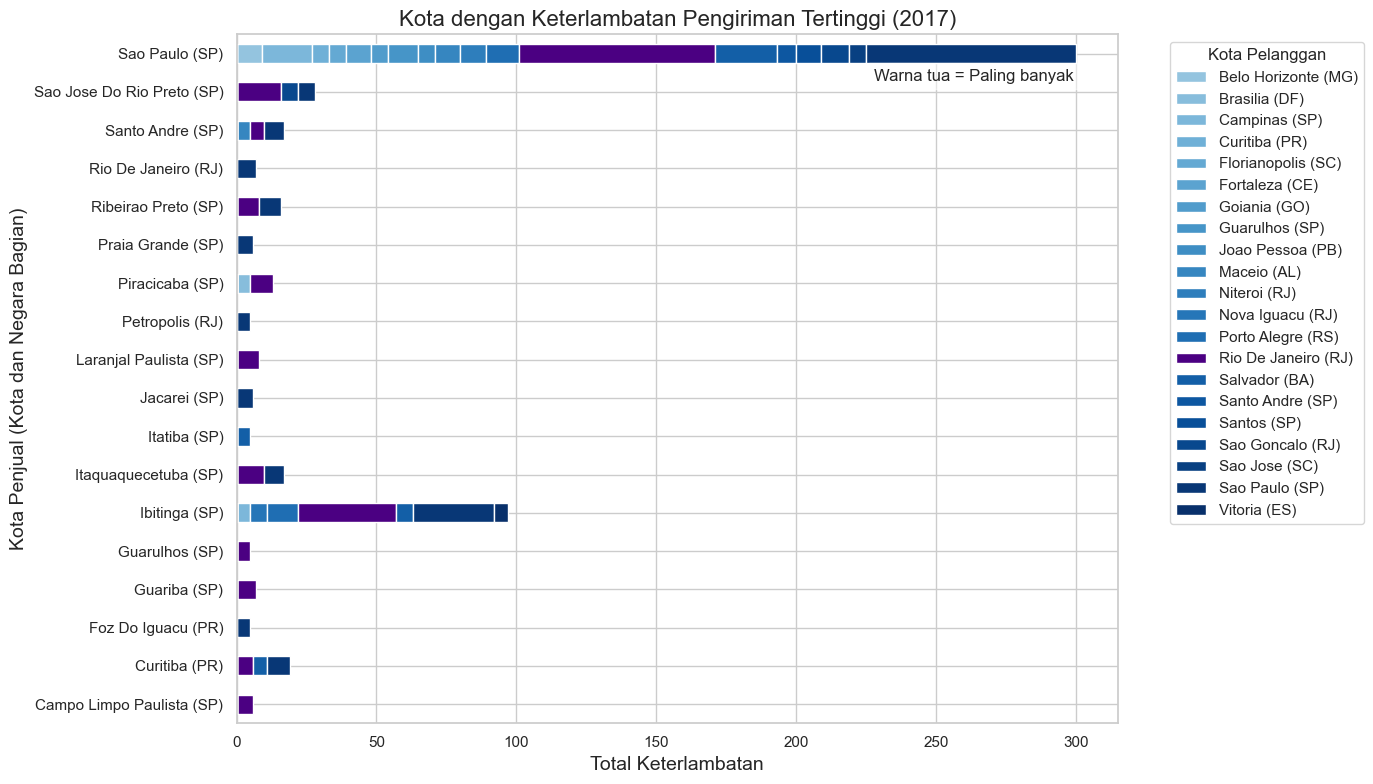

In [135]:
# Mengelompokkan data dan menghitung total_count
city_late_order_2017 = (
    category_late_order_2017
    .groupby(['seller_city', 'customer_city', 'seller_state', 'customer_state'])
    .agg(total_count=('delivery_delay_days', 'size'))
    .reset_index()
)

# Mengambil 50 teratas berdasarkan total_count
top_late_orders = city_late_order_2017.nlargest(50, 'total_count')

# Menggabungkan nama kota dan negara bagian untuk penjual dan pelanggan
top_late_orders['seller_city_state'] = top_late_orders['seller_city'] + ' (' + top_late_orders['seller_state'] + ')'
top_late_orders['customer_city_state'] = top_late_orders['customer_city'] + ' (' + top_late_orders['customer_state'] + ')'

# Membuat pivot untuk stacked bar chart
pivot_data = top_late_orders.pivot(
    index='seller_city_state', 
    columns='customer_city_state', 
    values='total_count'
).fillna(0)

# Membuat palet warna
num_colors = pivot_data.shape[1]
colors = plt.cm.Blues(np.linspace(0.4, 1, num_colors))  # Warna biru dari pastel ke gelap

# Menentukan warna untuk total_count tertinggi
max_color_index = pivot_data.sum(axis=0).idxmax()  # Indeks kolom dengan total_count tertinggi
colors[np.where(pivot_data.columns == max_color_index)[0][0]] = mcolors.to_rgba('#4B0082')  # Warna tua untuk total_count tertinggi

# Membuat stacked bar chart
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='barh', stacked=True, color=colors, ax=plt.gca())

# Menambahkan judul dan label
plt.title('Kota dengan Keterlambatan Pengiriman Tertinggi (2017)', fontsize=16)
plt.xlabel('Total Keterlambatan', fontsize=14)
plt.ylabel('Kota Penjual (Kota dan Negara Bagian)', fontsize=14)

# Menambahkan keterangan
plt.text(0.95, 0.95, 'Warna tua = Paling banyak', transform=plt.gca().transAxes, fontsize=12, 
        verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

# Menambahkan legenda
plt.legend(title='Kota Pelanggan', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menampilkan plot
plt.tight_layout()
plt.show()


#### City ontime order 2017

In [136]:
# Mengelompokkan data dan menghitung total_count serta rata-rata keterlambatan
city_ontime_order_2017 = (
    category_ontime_order_2017
    .groupby(['seller_city', 'customer_city', 'seller_state', 'customer_state'])
    .agg(total_count=('delivery_delay_days', 'size'), 
    average_delay=('delivery_delay_days', 'mean'))
    .reset_index()
)

# Membatasi hasil ke 10 teratas berdasarkan total_count
top_10_ontime_orders = city_ontime_order_2017.sort_values(by='total_count', ascending=False).head(10)

# Mengatur format rata-rata keterlambatan menjadi 2 angka setelah koma
top_10_ontime_orders['average_delay'] = top_10_ontime_orders['average_delay'].round(2)

top_10_ontime_orders

,seller_city,customer_city,seller_state,customer_state,total_count,average_delay
16544,Sao Paulo,Sao Paulo,SP,SP,790,10.60
16375,Sao Paulo,Rio De Janeiro,SP,RJ,389,11.92
15269,Sao Paulo,Belo Horizonte,SP,MG,197,13.02
6220,Ibitinga,Sao Paulo,SP,SP,196,12.96
15318,Sao Paulo,Brasilia,SP,DF,167,13.82
16301,Sao Paulo,Porto Alegre,SP,RS,133,14.54
13850,Santo Andre,Sao Paulo,SP,SP,131,12.18
15551,Sao Paulo,Curitiba,SP,PR,127,13.98
6137,Ibitinga,Rio De Janeiro,SP,RJ,111,11.34
15375,Sao Paulo,Campinas,SP,SP,111,8.47


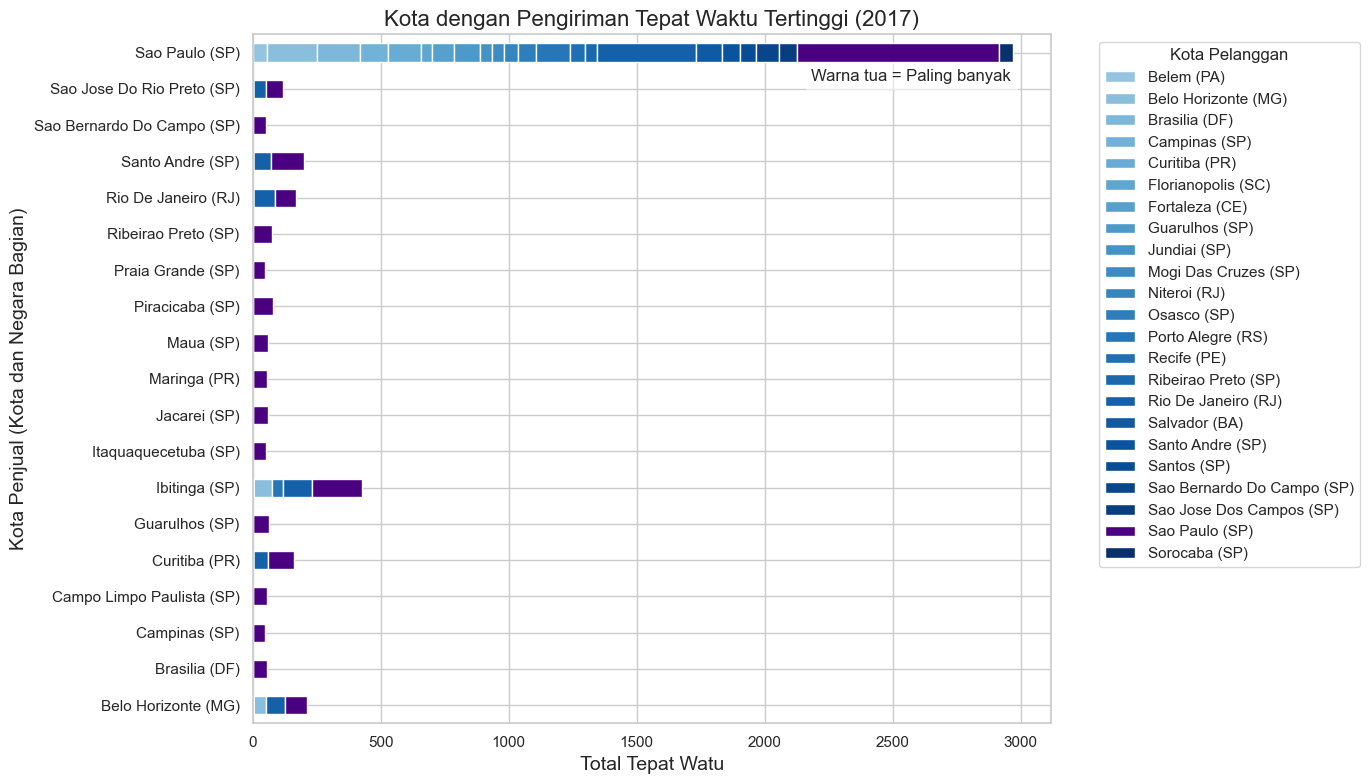

In [137]:
# Mengelompokkan data dan menghitung total_count
city_ontime_order_2017 = (
    category_ontime_order_2017
    .groupby(['seller_city', 'customer_city', 'seller_state', 'customer_state'])
    .agg(total_count=('delivery_delay_days', 'size'))
    .reset_index()
)

# Mengambil 50 teratas berdasarkan total_count
top_ontime_orders = city_ontime_order_2017.nlargest(50, 'total_count')

# Menggabungkan nama kota dan negara bagian untuk penjual dan pelanggan
top_ontime_orders['seller_city_state'] = top_ontime_orders['seller_city'] + ' (' + top_ontime_orders['seller_state'] + ')'
top_ontime_orders['customer_city_state'] = top_ontime_orders['customer_city'] + ' (' + top_ontime_orders['customer_state'] + ')'

# Membuat pivot untuk stacked bar chart
pivot_data = top_ontime_orders.pivot(
    index='seller_city_state', 
    columns='customer_city_state', 
    values='total_count'
).fillna(0)

# Membuat palet warna
num_colors = pivot_data.shape[1]
colors = plt.cm.Blues(np.linspace(0.4, 1, num_colors))  # Warna biru dari pastel ke gelap

# Menentukan warna untuk total_count tertinggi
max_color_index = pivot_data.sum(axis=0).idxmax()  # Indeks kolom dengan total_count tertinggi
colors[np.where(pivot_data.columns == max_color_index)[0][0]] = mcolors.to_rgba('#4B0082')  # Warna tua untuk total_count tertinggi

# Membuat stacked bar chart
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='barh', stacked=True, color=colors, ax=plt.gca())

# Menambahkan judul dan label
plt.title('Kota dengan Pengiriman Tepat Waktu Tertinggi (2017)', fontsize=16) 
plt.xlabel('Total Tepat Watu', fontsize=14)
plt.ylabel('Kota Penjual (Kota dan Negara Bagian)', fontsize=14)

# Menambahkan keterangan
plt.text(0.95, 0.95, 'Warna tua = Paling banyak', transform=plt.gca().transAxes, fontsize=12, 
        verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

# Menambahkan legenda
plt.legend(title='Kota Pelanggan', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menampilkan plot
plt.tight_layout()
plt.show()


#### Gabungan 

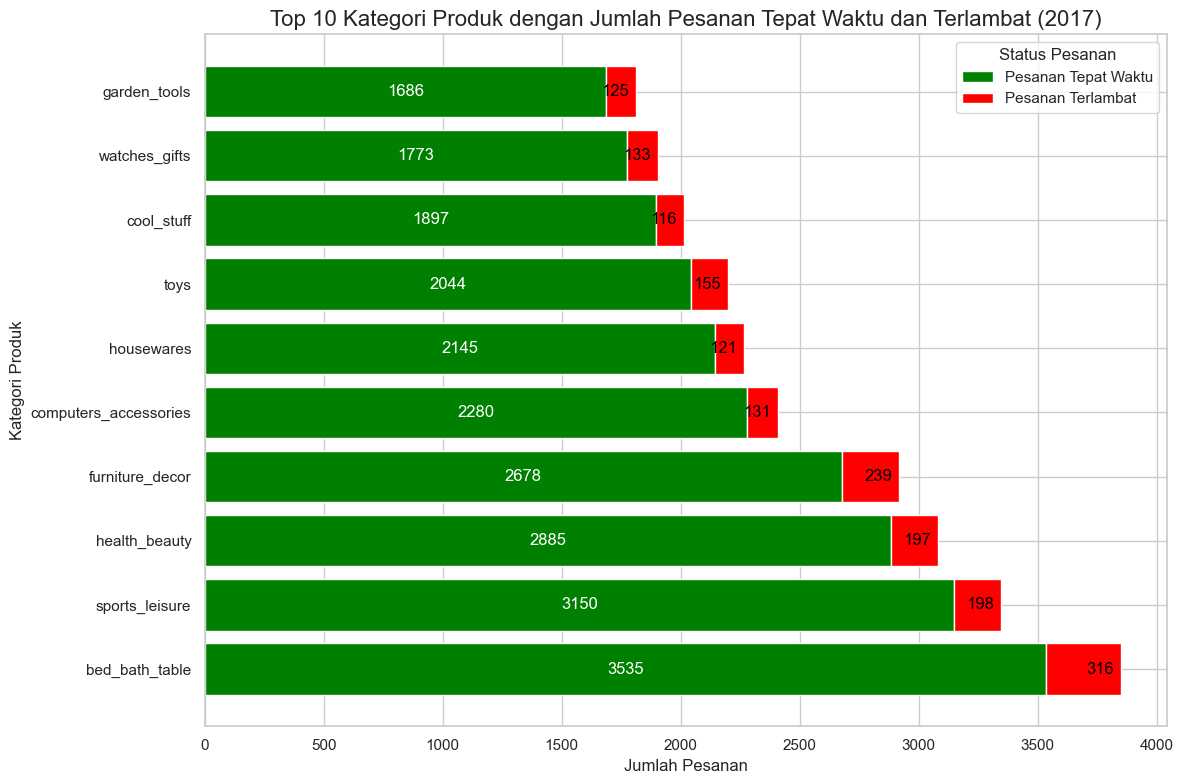

In [138]:
# Menghitung jumlah pesanan tepat waktu dan terlambat per kategori
ontime_order_counts = category_ontime_order_2017['product_category_name'].value_counts()
late_order_counts = category_late_order_2017['product_category_name'].value_counts()

# Membuat DataFrame
combined_orders = pd.DataFrame({
    'product_category_name': ontime_order_counts.index,
    'ontime_order_count': ontime_order_counts.values,
    'late_order_count': late_order_counts.reindex(ontime_order_counts.index, fill_value=0)
})

# Mengambil 10 kategori teratas berdasarkan total pesanan
combined_orders['total_orders'] = combined_orders['ontime_order_count'] + combined_orders['late_order_count']
top10_combined_orders = combined_orders.nlargest(10, 'total_orders')

# Membuat Stacked Bar Chart
plt.figure(figsize=(12, 8))
plt.barh(top10_combined_orders['product_category_name'], top10_combined_orders['ontime_order_count'], color='green', label='Pesanan Tepat Waktu')
plt.barh(top10_combined_orders['product_category_name'], top10_combined_orders['late_order_count'], 
        left=top10_combined_orders['ontime_order_count'], color='red', label='Pesanan Terlambat')

# Menambahkan angka di dalam dan di luar bar
for index, row in top10_combined_orders.iterrows():
    plt.text(row['ontime_order_count'] / 2, index, int(row['ontime_order_count']), va='center', ha='center', color='white')
    plt.text(row['ontime_order_count'] + row['late_order_count'] - 30, index, int(row['late_order_count']), va='center', ha='right', color='black')

# Menambahkan label, judul, dan legenda
plt.title('Top 10 Kategori Produk dengan Jumlah Pesanan Tepat Waktu dan Terlambat (2017)', fontsize=16)
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Kategori Produk')
plt.legend(title='Status Pesanan', loc='upper right')

plt.tight_layout()
plt.show()

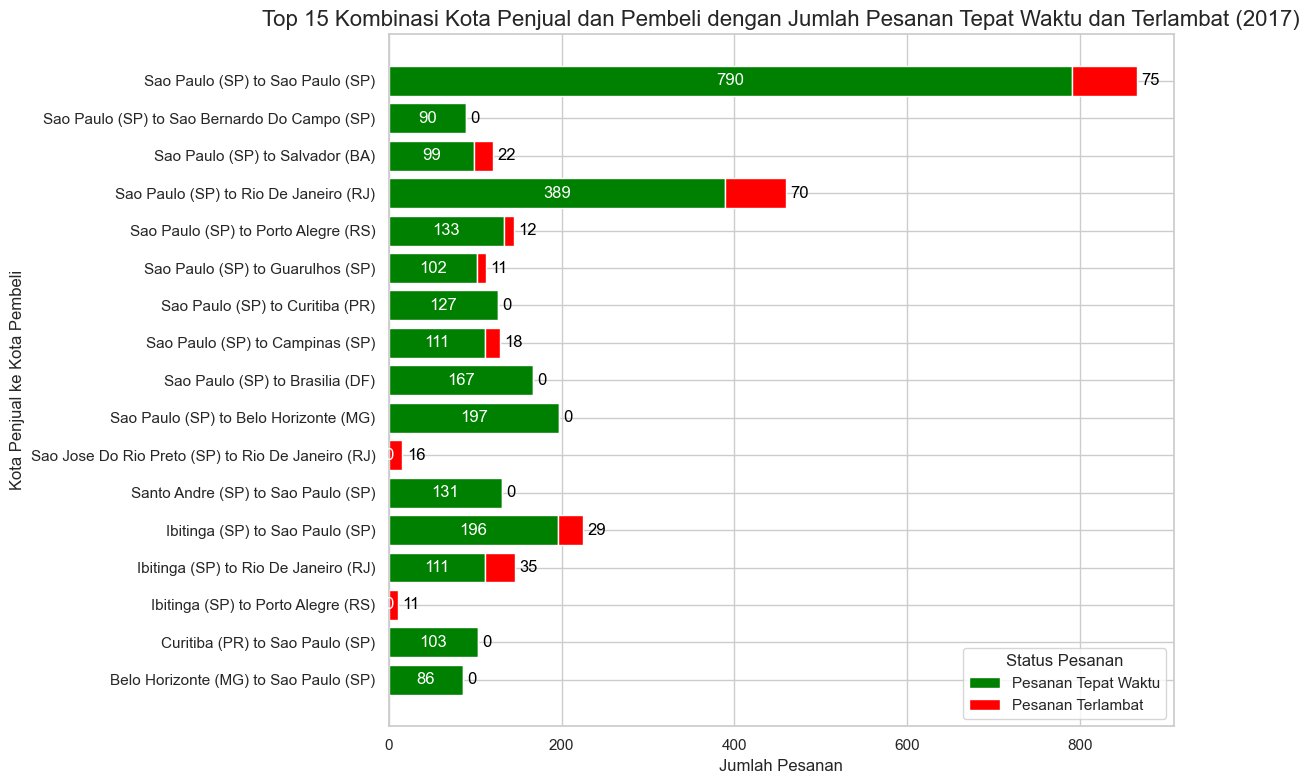

In [139]:
# Mengelompokkan data dan menghitung total_count untuk pesanan tepat waktu
city_ontime_order_2017 = (
    category_ontime_order_2017
    .groupby(['seller_city', 'seller_state', 'customer_city', 'customer_state'])
    .agg(total_count=('delivery_delay_days', 'size'))
    .reset_index()
)

# Mengambil 15 teratas untuk pesanan tepat waktu
top_15_ontime_orders = city_ontime_order_2017.nlargest(15, 'total_count')

# Mengelompokkan data dan menghitung total_count untuk pesanan terlambat
city_late_order_2017 = (
    category_late_order_2017
    .groupby(['seller_city', 'seller_state', 'customer_city', 'customer_state'])
    .agg(total_count=('delivery_delay_days', 'size'))
    .reset_index()
)

# Mengambil 10 teratas untuk pesanan terlambat
top_10_late_orders = city_late_order_2017.nlargest(10, 'total_count')

# Menggabungkan data ontime dan late
combined_orders = pd.merge(top_15_ontime_orders, top_10_late_orders, 
                            on=['seller_city', 'seller_state', 'customer_city', 'customer_state'], 
                            suffixes=('_ontime', '_late'), 
                            how='outer').fillna(0)

# Membuat label
combined_orders['label'] = combined_orders['seller_city'] + ' (' + combined_orders['seller_state'] + ') to ' + \
                            combined_orders['customer_city'] + ' (' + combined_orders['customer_state'] + ')'

# Membuat Stacked Bar Chart
plt.figure(figsize=(12, 8))
plt.barh(combined_orders['label'], 
        combined_orders['total_count_ontime'], color='green', label='Pesanan Tepat Waktu')
plt.barh(combined_orders['label'], 
        combined_orders['total_count_late'], 
        left=combined_orders['total_count_ontime'], color='red', label='Pesanan Terlambat')

# Menambahkan angka di dalam dan di luar bar
for index, row in combined_orders.iterrows():
    plt.text(row['total_count_ontime'] / 2, index, int(row['total_count_ontime']), va='center', ha='center', color='white')
    plt.text(row['total_count_ontime'] + row['total_count_late'] + 5, index, int(row['total_count_late']), va='center', ha='left', color='black')

# Menambahkan label, judul, dan legenda
plt.title('Top 15 Kombinasi Kota Penjual dan Pembeli dengan Jumlah Pesanan Tepat Waktu dan Terlambat (2017)', fontsize=16)
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Kota Penjual ke Kota Pembeli')
plt.legend(title='Status Pesanan', loc='lower right')

plt.tight_layout()
plt.show()


#### Kesimpulan dan Insight
- Dari data yang ditampilkan, terlihat bahwa meskipun ada banyak pesanan yang dikirim tepat waktu, jumlah pesanan terlambat juga signifikan, terutama di kategori produk tertentu. Ini menunjukkan bahwa ada ruang untuk perbaikan dalam manajemen pengiriman.
- Kategori produk yang paling banyak dipesan tepat waktu dan terlambat menunjukkan bahwa beberapa kategori, seperti bed_bath_table, memiliki volume pesanan yang tinggi, tetapi juga mengalami keterlambatan yang signifikan. Keterlambatan pengiriman dapat disebabkan oleh berbagai faktor, termasuk masalah logistik, cuaca, atau permintaan yang tidak terduga.
- **Kota Sao Paulo (SP)** mencatat jumlah keterlambatan pengiriman tertinggi pada tahun **2017**, diikuti oleh **Sao Jose Do Rio Preto (SP)** dan **Santo Andre (SP)**. Ini menunjukkan bahwa kota-kota besar dengan volume pengiriman tinggi mungkin menghadapi tantangan dalam menjaga ketepatan waktu pengiriman.
- **Kota Sao Paulo (SP)** juga mendominasi dalam hal pengiriman tepat waktu, menunjukkan bahwa meskipun ada tantangan, kota ini masih mampu memenuhi sebagian besar pengiriman tepat waktu.
- **Faktor Keterlambatan**: Keterlambatan pengiriman dapat dipengaruhi oleh faktor-faktor seperti jarak antara kota penjual dan pembeli, infrastruktur transportasi, dan volume pesanan. Kota-kota dengan infrastruktur yang lebih baik cenderung memiliki tingkat keterlambatan yang lebih rendah.
- **Kinerja Kategori Produk**: Kategori produk yang memiliki volume pesanan tinggi, seperti bed_bath_table, perlu mendapatkan perhatian lebih dalam hal manajemen rantai pasokan untuk mengurangi keterlambatan.
- **Kota Penjual dan Pembeli**: Kombinasi kota penjual dan pembeli yang sering mengalami keterlambatan dapat menjadi fokus untuk meningkatkan efisiensi pengiriman.

#### Rekomendasi
- **Peningkatan Infrastruktur**: Jika memungkinkan, perusahaan harus berinvestasi dalam infrastruktur logistik, terutama di kota-kota dengan volume pengiriman tinggi, untuk meningkatkan efisiensi dan mengurangi keterlambatan.
- **Pelatihan dan Pengembangan**: Berikan pelatihan kepada staf terkait manajemen pengiriman dan logistik untuk meningkatkan pemahaman mereka tentang faktor-faktor yang mempengaruhi ketepatan waktu pengiriman.
- **Kampanye Pemasaran**: Fokus pada kategori produk yang menunjukkan pertumbuhan tinggi dan tingkat keterlambatan rendah untuk memaksimalkan potensi penjualan dan kepuasan pelanggan.
- **Analisis Rantai Pasokan**: Lakukan analisis mendalam terhadap rantai pasokan untuk mengidentifikasi titik-titik yang menyebabkan keterlambatan. Ini dapat mencakup evaluasi mitra logistik dan proses pengiriman.

## Analisis Lanjutan RFM (Opsional)

In [140]:
# Menampilkan order_purchase_timestamp terakhir
last_order_timestamp = product_orders_sellers_review_customer_merged['order_purchase_timestamp'].max()
print("Order Purchase Timestamp Terakhir:", last_order_timestamp)

Order Purchase Timestamp Terakhir: 2018-09-03 00:00:00


In [141]:
# Menentukan tanggal analisis dengan pembelian terakhir
date = dt.datetime(2018, 9, 3)

# Menghitung Recency
rfm = product_orders_sellers_review_customer_merged.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'price': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

# Mengelompokkan pelanggan berdasarkan RFM
# Menggunakan quantiles untuk mengelompokkan
rfm['R_quartile'] = pd.qcut(rfm['recency'], 4, labels=[4, 3, 2, 1])  # Semakin kecil nilai recency, semakin baik
rfm['F_quartile'] = pd.qcut(rfm['frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])  # Semakin tinggi frekuensi, semakin baik
rfm['M_quartile'] = pd.qcut(rfm['monetary'].rank(method='first'), 4, labels=[1, 2, 3, 4])  # Semakin tinggi pengeluaran, semakin baik

# Menghitung skor RFM
rfm['RFM_Score'] = rfm['R_quartile'].astype(str) + rfm['F_quartile'].astype(str) + rfm['M_quartile'].astype(str)

# Menampilkan hasil akhir
rfm[['customer_id', 'recency', 'frequency', 'monetary', 'RFM_Score']].sort_values(by=(['RFM_Score']), ascending=False)


,customer_id,recency,frequency,monetary,RFM_Score
77004,cb6b298a2a15ea89e712248ae05dbab4,51,1,890.00,444
76287,c9915c7f8ac83ac76a9a605f4a4db5f9,25,1,229.99,444
72975,c0ba81c65bd30a9c04cd3650c0dbed36,12,2,294.80,444
96023,feb0ec401c19c2f55e9a93280567ff98,89,1,260.00,444
76302,c99a11e718aec7c3a6136757b0467d3e,27,1,179.99,444
...,...,...,...,...,...
15976,2a2bc4b0a26498448f7f6a887f048bb7,428,1,17.68,111
5940,0fd45421dff2a32e42a61c73ffe2ad90,579,1,26.00,111
15968,2a24c9f16ef70dc2ccfe21c729df295d,449,1,27.90,111
5944,0fd700c3808e829c7bfd88d2a38e6c6b,466,1,22.68,111


### Insight dan Kesimpulan yang didapat dari analisis lanjutan

- **RFM Score**: Skor RFM adalah kombinasi dari ketiga metrik di atas. Skor tertinggi adalah 444 (pelanggan terbaik dalam hal recency, frequency, dan monetary), dan skor terendah adalah 111 (pelanggan terburuk dalam ketiga aspek tersebut).
- **Identifikasi Pelanggan Loyal**: Pelanggan dengan skor RFM tinggi (misalnya, 444) adalah pelanggan yang sangat loyal. Mereka sering melakukan pembelian, mengeluarkan banyak uang, dan baru-baru ini melakukan pembelian. Ini adalah pelanggan yang paling berharga bagi bisnis dan perlu diberikan perhatian khusus, seperti program loyalitas atau penawaran eksklusif.

- **Pelanggan yang Perlu Diperhatikan**: Pelanggan dengan skor recency rendah (misalnya, 1) tetapi frequency dan monetary tinggi (misalnya, 314) adalah pelanggan yang perlu diperhatikan. Mereka sebelumnya adalah pelanggan yang baik, tetapi sudah lama tidak melakukan pembelian. Kampanye re-engagement dapat diterapkan untuk menarik mereka kembali.

- **Peluang Upselling**:Pelanggan dengan skor frequency rendah tetapi monetary tinggi (misalnya, 141) adalah pelanggan yang melakukan pembelian besar tapi jarang. Ada potensi untuk meningkatkan frekuensi pembelian mereka dengan menawarkan produk tambahan atau promosi khusus.

- **Segmentasi Pelanggan**: Dengan menggunakan skor RFM, pelanggan dapat disegmentasi menjadi beberapa kelompok seperti pelanggan loyal, pelanggan berpotensi, pelanggan yang perlu di-reengage, dan pelanggan dengan kontribusi rendah. Setiap segmen ini dapat ditargetkan dengan strategi pemasaran yang berbeda sesuai dengan karakteristik mereka.

## Conclusion

- **Conclution pertanyaan 1**: Bagaimana tren total pesanan per kategori produk dari tahun 2016 hingga 2018 dan kategori apa saja yang palign banyak pendapatan dan penjualannya?
    1. Kinerja Kategori Produk: Kategori seperti furniture_decor, health_beauty, dan watches_gifts menunjukkan penjualan yang konsisten tinggi, sementara kategori seperti security_and_services dan fashion_children_clothes menunjukkan potensi untuk perbaikan.
    2. Pergeseran Tren: Terdapat pergeseran dalam kategori teratas dari tahun ke tahun, dengan beberapa kategori baru muncul dan yang sebelumnya dominan mulai menurun, menunjukkan dinamika pasar yang perlu diperhatikan.
    3. Masalah Konversi: Kategori dengan total pesanan tinggi tetapi penjualan rendah menunjukkan adanya masalah dalam konversi, yang memerlukan analisis lebih lanjut untuk meningkatkan daya tarik produk.


- **Conclution pertanyaan 2**: Bagaimana tren penjualan per kategori produk dari tahun 2016 hingga 2018, dan kategori mana yang menunjukkan pertumbuhan paling signifikan?
    1. Pertumbuhan Signifikan pada Kategori "bed_bath_table": Kategori "bed_bath_table" mencatatkan pertumbuhan penjualan yang sangat luar biasa dengan peningkatan sebesar 134,720.70% dari tahun 2016 hingga 2018, menunjukkan popularitas yang semakin meningkat di kalangan konsumen.
    2. Kategori Berkinerja Stabil: Kategori seperti watches_gifts dan health_beauty menunjukkan pertumbuhan yang lebih stabil dibandingkan kategori lain, meskipun tidak sebanding dengan lonjakan besar yang terjadi pada bed_bath_table.
    3. Rekomendasi Fokus dan Inovasi: Perusahaan disarankan untuk meningkatkan investasi di kategori dengan pertumbuhan tinggi, seperti bed_bath_table, serta mengembangkan kampanye pemasaran terintegrasi dan terus berinovasi untuk mempertahankan dan meningkatkan penjualan di kategori yang sukses.


- **Conclution pertanyaan 3**: Bagaimana tren penjualan dan rata-rata skor ulasan per bulan dari tahun 2016 hingga 2018, serta bulan mana yang menunjukkan pertumbuhan paling signifikan dalam penjualan pertahun?
    1. Pertumbuhan Penjualan Tertinggi dan Terendah: Pertumbuhan penjualan tertinggi tercatat pada bulan Februari 2017 (108.16%), sementara penurunan terbesar terjadi pada Desember 2018 (-25.22%). Hal ini menunjukkan adanya faktor musiman atau tantangan eksternal yang mempengaruhi penjualan.
    2. Pentingnya Strategi Pemasaran yang Efektif: Bulan-bulan dengan pertumbuhan penjualan dan skor ulasan tertinggi menunjukkan bahwa strategi pemasaran yang berhasil dapat meningkatkan hasil secara signifikan. Evaluasi kampanye pemasaran perlu dilakukan untuk memahami apa yang efektif dan menerapkannya di masa depan.
    3. Fokus pada Peningkatan Kualitas: Untuk meningkatkan skor ulasan dan mengatasi penurunan penjualan, fokus pada peningkatan kualitas produk dan layanan pelanggan sangat penting, serta analisis lebih mendalam tentang faktor yang mempengaruhi fluktuasi penjualan dan ulasan.


- **Conclution pertanyaan 4**: Berapa banyak pesanan yang berhasil terkirim tepat waktu dibandingkan dengan yang terlambat selama tahun 2017, dan faktor apa yang paling berpengaruh terhadap keterlambatan pengiriman?
    1. Keterlambatan Pengiriman Signifikan: Meskipun ada banyak pengiriman tepat waktu, beberapa kategori produk, seperti bed_bath_table, mengalami keterlambatan yang signifikan. Hal ini menunjukkan adanya ruang untuk perbaikan dalam manajemen pengiriman, terutama di kota-kota dengan volume pengiriman tinggi seperti Sao Paulo (SP).
    2. Faktor Penyebab Keterlambatan: Keterlambatan pengiriman dapat dipengaruhi oleh berbagai faktor, termasuk jarak antar kota, infrastruktur transportasi, dan volume pesanan. Kota-kota dengan infrastruktur yang lebih baik cenderung memiliki tingkat keterlambatan yang lebih rendah.
    3. Fokus pada Kategori Berkinerja Tinggi dan Infrastruktur Logistik: Kategori produk dengan volume pesanan tinggi, seperti bed_bath_table, memerlukan perhatian lebih dalam manajemen rantai pasokan untuk mengurangi keterlambatan. Selain itu, perusahaan disarankan untuk meningkatkan infrastruktur logistik di kota-kota dengan volume pengiriman tinggi untuk meningkatkan efisiensi dan mengurangi keterlambatan.